In [1]:
import pandas as pd
from os.path import join
from src.pairs_based_analysis import PairsBasedAnalysis

In [2]:
# Examplary files

In [3]:
pd.read_parquet("EPIC_50.parquet").head() # mask containing information about CpG pairs postions

Pair  BasePos  SuccessivePos  Distance    CHR
0   cg15886596-cg03217254    70880        70893.0      13.0  chr19
16  cg01861377-cg25827309   281445       281467.0      22.0  chr19
25  cg02725885-cg09908879   291239       291244.0       5.0  chr19
26  cg09908879-cg16691033   291244       291265.0      21.0  chr19
28  cg02935627-cg12272837   291306       291315.0       9.0  chr19

In [4]:
pd.read_parquet("../../data/WBC/mynorm.parquet").head() # mynorm containing information about CpG methylation levels

Bcell 1   Bcell 2   Bcell 3   Bcell 4   Bcell 5   Bcell 6  \
cg07881041  0.934623  0.945126  0.949950  0.925165  0.933043  0.937871   
cg03513874  0.948216  0.954021  0.957893  0.895708  0.948562  0.928594   
cg05451842  0.038191  0.027666  0.039520  0.039978  0.023541  0.035101   
cg14797042  0.967942  0.973269  0.969593  0.967892  0.978920  0.960537   
cg09838562  0.033657  0.022031  0.033810  0.030355  0.029839  0.040918   

             Bcell 7   Bcell 8   Bcell 9  Bcell 10  ...   Mono 31   Mono 32  \
cg07881041  0.966849  0.956502  0.961828  0.968028  ...  0.968925  0.963269   
cg03513874  0.974476  0.982421  0.971944  0.953905  ...  0.971558  0.952566   
cg05451842  0.059066  0.053307  0.057478  0.076656  ...  0.088595  0.096157   
cg14797042  0.991229  0.973439  0.962797  0.954498  ...  0.981829  0.962539   
cg09838562  0.051585  0.030112  0.065251  0.063097  ...  0.069278  0.122576   

             Mono 33   Mono 34      NK 1      NK 2      NK 3      NK 4  \
cg07881041  0.959942  0.937992  0.917410  0.941723  0.930184  0.931863   
cg03513874  0.955677  0.923018  0.926352  0.954642  0.936648  0.932953   
cg05451842  0.078354  0.126599  0.051434  0.045849  0.044569  0.025067   
cg14797042  0.960674  0.972055  0.952987  0.978000  0.969743  0.972507   
cg09838562  0.086307  0.070985  0.038731  0.031958  0.050337  0.038289   

                NK 5      NK 6  
cg07881041  0.928604  0.942816  
cg03513874  0.942582  0.935093  
cg05451842  0.025514  0.027329  
cg14797042  0.973333  0.964315  
cg09838562  0.033904  0.048602  

[5 rows x 178 columns]

In [5]:
pd.read_parquet("../../data/WBC/sample_sheet.parquet").head() # sample sheet containing information about sample type

Sample_Group
Bcell 1        Bcell
Bcell 2        Bcell
Bcell 3        Bcell
Bcell 4        Bcell
Bcell 5        Bcell

In [6]:
# analysis

In [7]:
analysis = PairsBasedAnalysis(project_dir_path="EXAMPLE_PROJECT/", 
                              mask="EPIC_50.parquet", # mask generated in Example 1 
                              non_co_methylation_threshold = 0.3, # methylation levels minimum threshold
                              manifest="../../external/EPIC.parquet", # Illumina manifest file
                              alpha=0.05, # statistical significance level
                              mynorm="../../data/WBC/mynorm.parquet", # mynorm file 
                              sample_sheet="../../data/WBC/sample_sheet.parquet" # sample sheet containing Sample_Group column with phenotype (categorical) information
                             )

Mynorm shape: (717578, 178)
Sample sheet shape: (178, 1)


In [8]:
# Step 1: Build project directory and update mask 

In [9]:
analysis._PairsBasedAnalysis__build_output_dir()
analysis._PairsBasedAnalysis__update_mask()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87258/87258 [00:00<00:00, 1030266.10it/s]


In [10]:
# Step 2: Fit models per each CpG pair in each group of samples

In [11]:
analysis.fit_model_per_group()
analysis.build_comparison_frame()
analysis.mark_types_of_markers()
analysis.mark_co_methylated_DMRS()

In dir: EXAMPLE_PROJECT/models found ['EXAMPLE_PROJECT/models/Bcell.csv', 'EXAMPLE_PROJECT/models/CD4.csv', 'EXAMPLE_PROJECT/models/CD8.csv', 'EXAMPLE_PROJECT/models/Gran.csv', 'EXAMPLE_PROJECT/models/Mono.csv', 'EXAMPLE_PROJECT/models/NK.csv'].


0it [00:00, ?it/s]/media/janbinkowski/Dane/DiscordantProject/V_3/notebooks/PairsBasedAnalysis/src/pairs_based_analysis.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'between cutoffs' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comparison_frame.loc[pair, "marker_status"] = status
72715it [00:34, 2127.51it/s]
40712it [00:02, 17825.62it/s]


In [12]:
# Step 3: Calculate delta beta values and assign status for each CpG pair 

In [23]:
analysis.create_delta_norm()
analysis.calculate_type_to_type_stats()
analysis.mark_markers()
analysis.mark_specific_markers()
analysis.export_frames_per_type()
analysis.comparison_frame.to_csv(join("EXAMPLE_PROJECT/files", f"comparison_frame.csv"))

In [24]:
# Step 4: Main analysis

In [25]:
analysis.plots(analysis.pairs_per_marker_type, limit=10) # generate and export examplary 2D scatter plots for each type of markers

generating 2D plots for discordantly methylated cell specific: 100%|█████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.32it/s]
generating 2D plots for between cutoffs: 100%|███████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.41it/s]
generating 2D plots for co-methylated cell specific: 100%|███████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.94it/s]
generating 2D plots for common co-methylated: 100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.25it/s]
generating 2D plots for common discordantly methylated: 100%|████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.30it/s]


<Figure size 1300x1300 with 0 Axes>

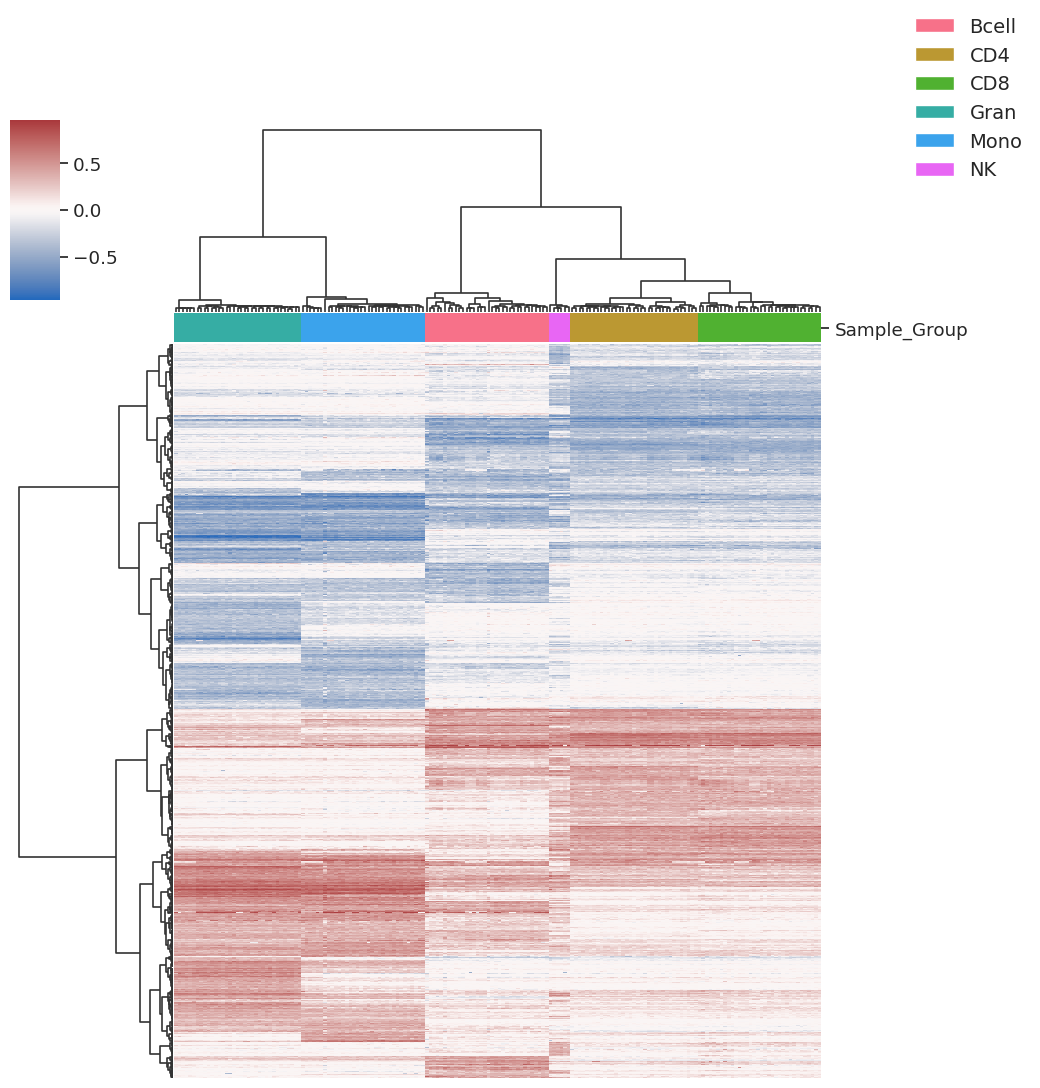

<Figure size 1300x1300 with 0 Axes>

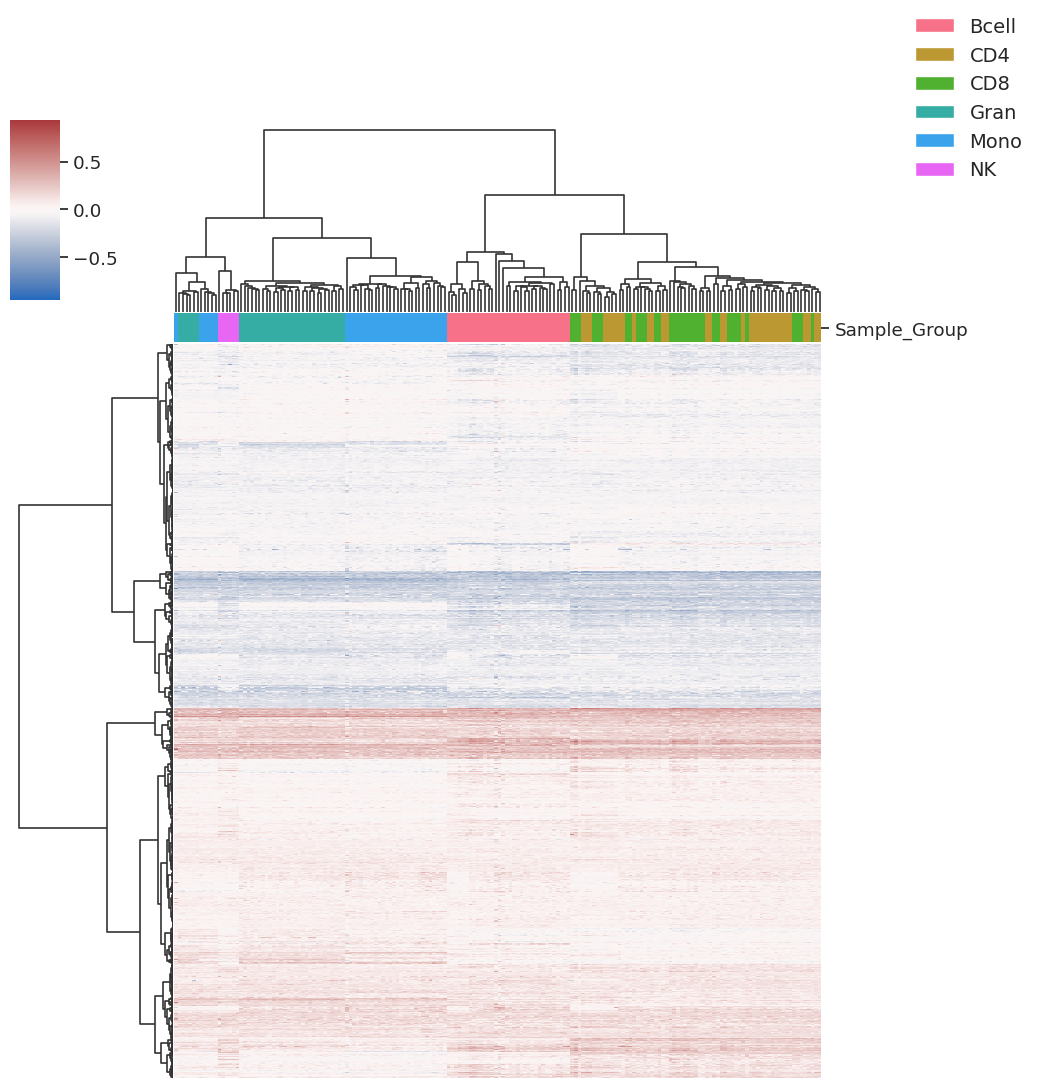

<Figure size 1300x1300 with 0 Axes>

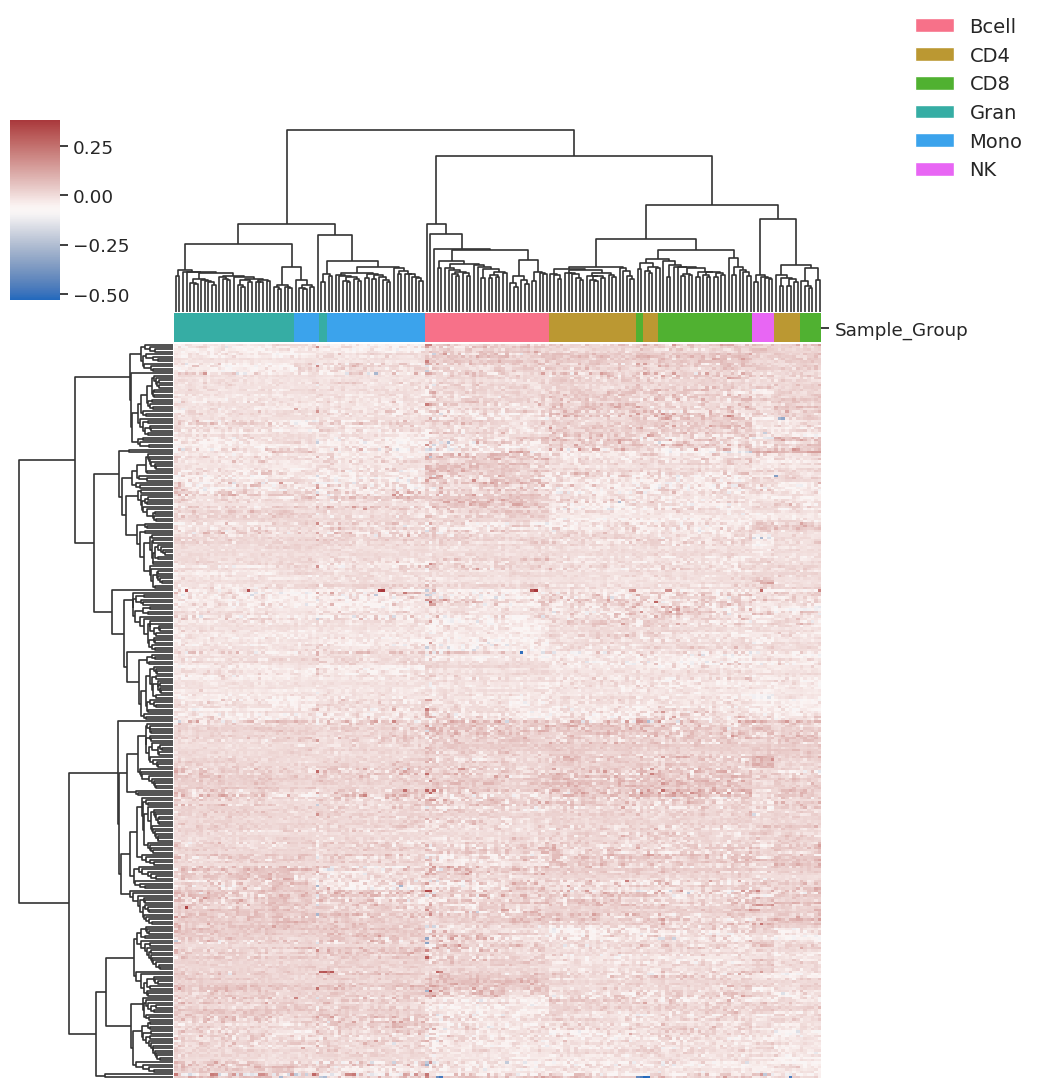

<Figure size 1300x1300 with 0 Axes>

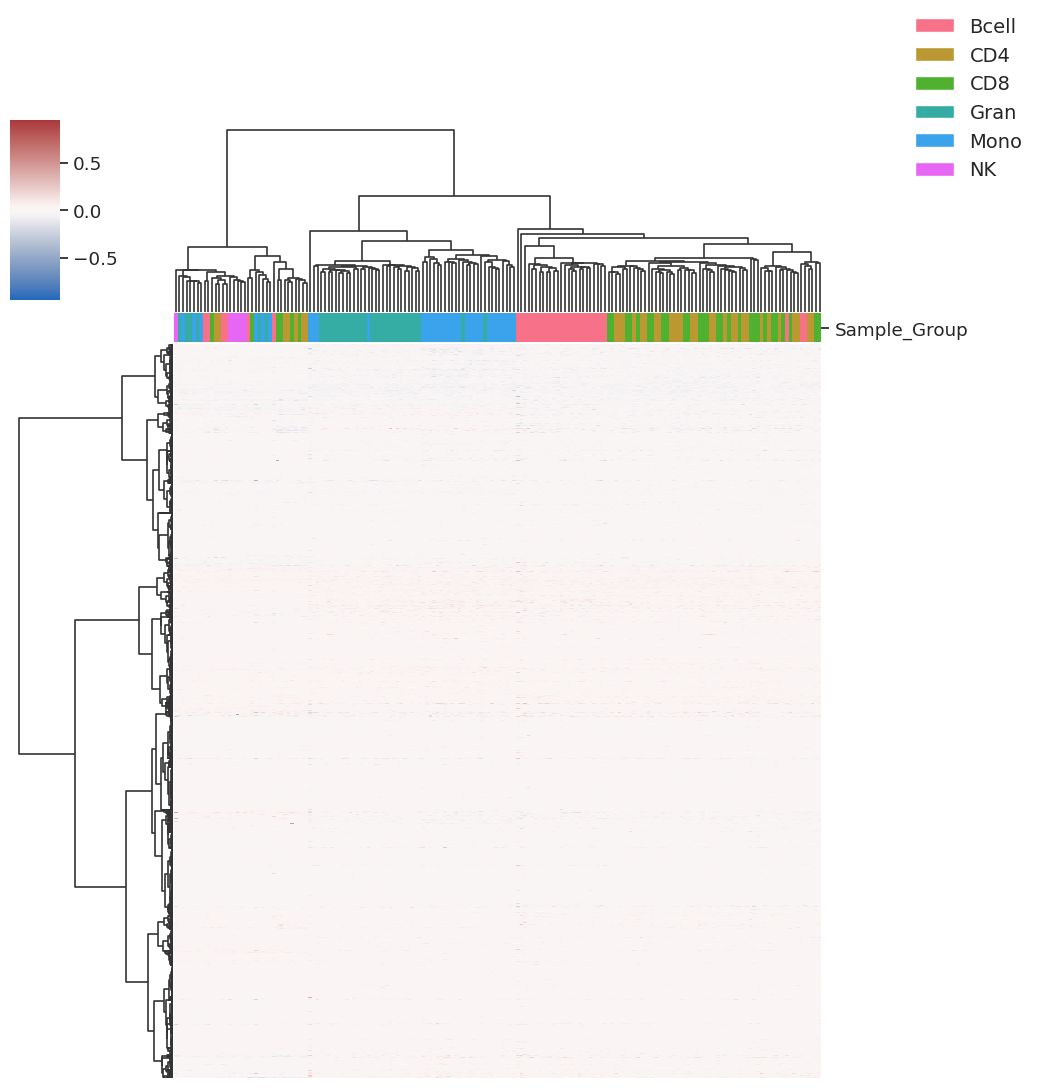

<Figure size 1300x1300 with 0 Axes>

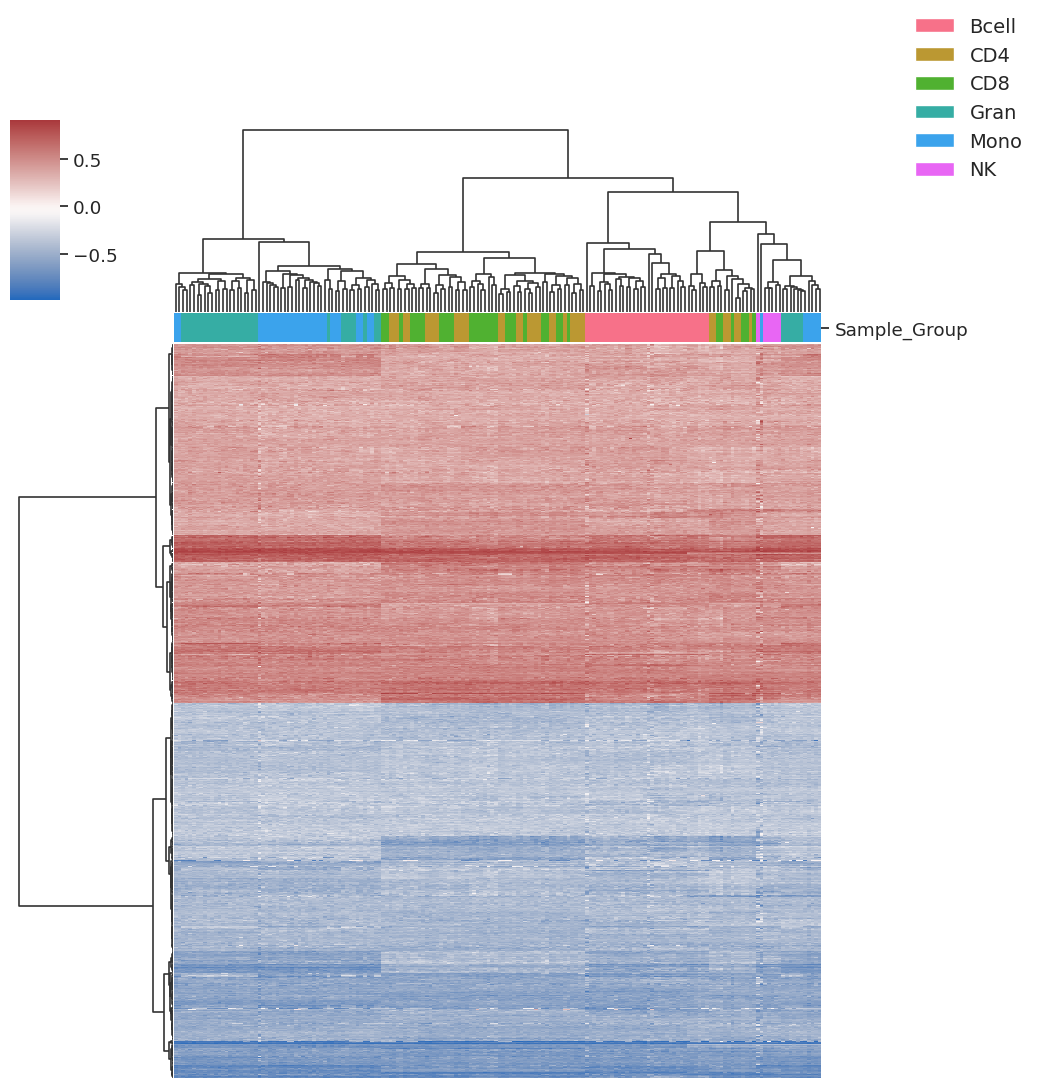

In [27]:
analysis.cluster_map(analysis.pairs_per_marker_type) # generate and export clustermaps

<Figure size 1300x1300 with 0 Axes>

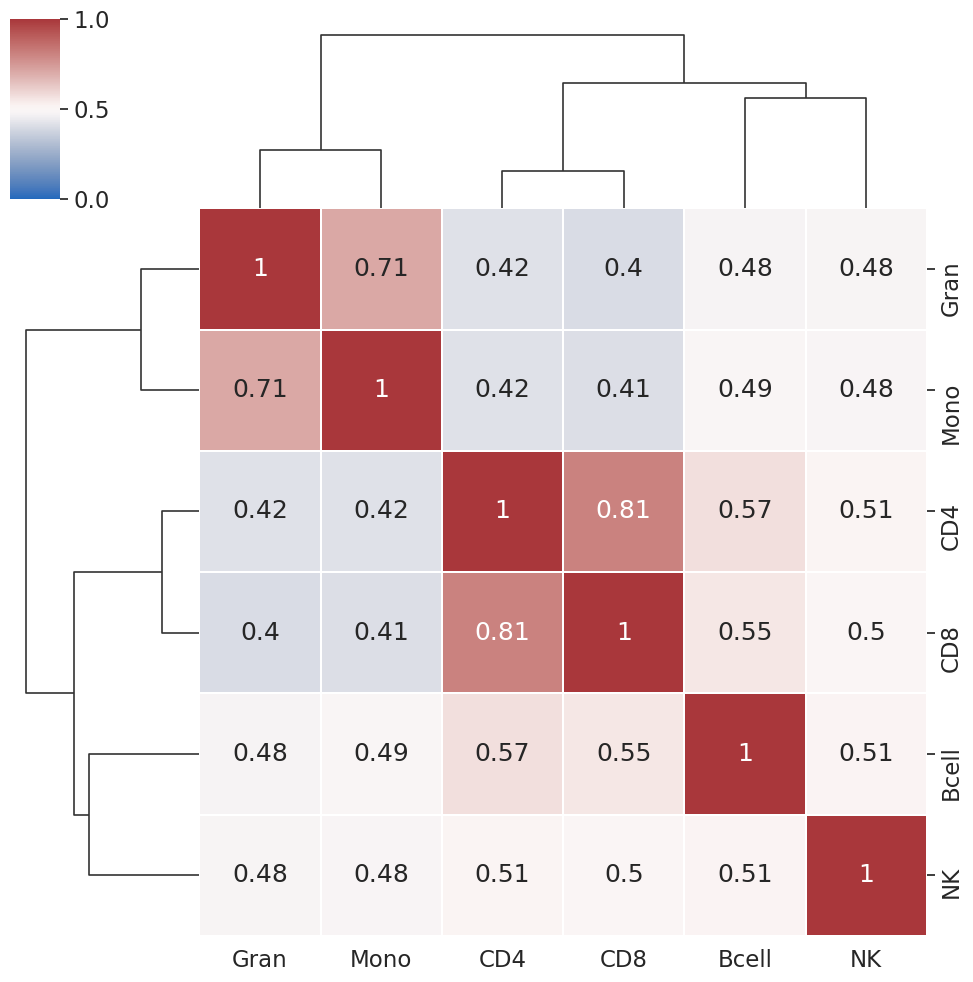

In [28]:
analysis.intersection_map() # Generate intersection map between cell types

In [29]:
analysis.export_bed(analysis.pairs_per_marker_type) # Export BED file for enrichment analysis, for example HOMER
analysis.export_bed({"BG": analysis.mask.set_index("Pair")}) # Export BG BED file for enrichment analysis, for example HOMER

In [30]:
analysis.export_genes_list(analysis.pairs_per_marker_type) # Export gene set list file for enrichment analysis, for example FUMA
analysis.export_genes_list({"BG": analysis.mask.set_index("Pair")}) # Export BG BED file for enrichment analysis, for example FUMA


	Position file = EXAMPLE_PROJECT/files/discordantly methylated cell specific.bed
	Genome = hg19
	Output Directory = EXAMPLE_PROJECT/files/HOMER_discordantly methylated cell specific
	Will use repeat masked sequences
	Normalizing sequences using CpG% instead of overall GC%
	background position file: EXAMPLE_PROJECT/files/BG.bed
	Using hypergeometric distribution for p-values
	Will not run homer for de novo motifs
	Using 10 CPUs
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 1040
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 1040
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Peak/BED file conversion summary:
		BED/Header formatted lines: 72715
		peakfile formatted lines: 0
	Max distance to m

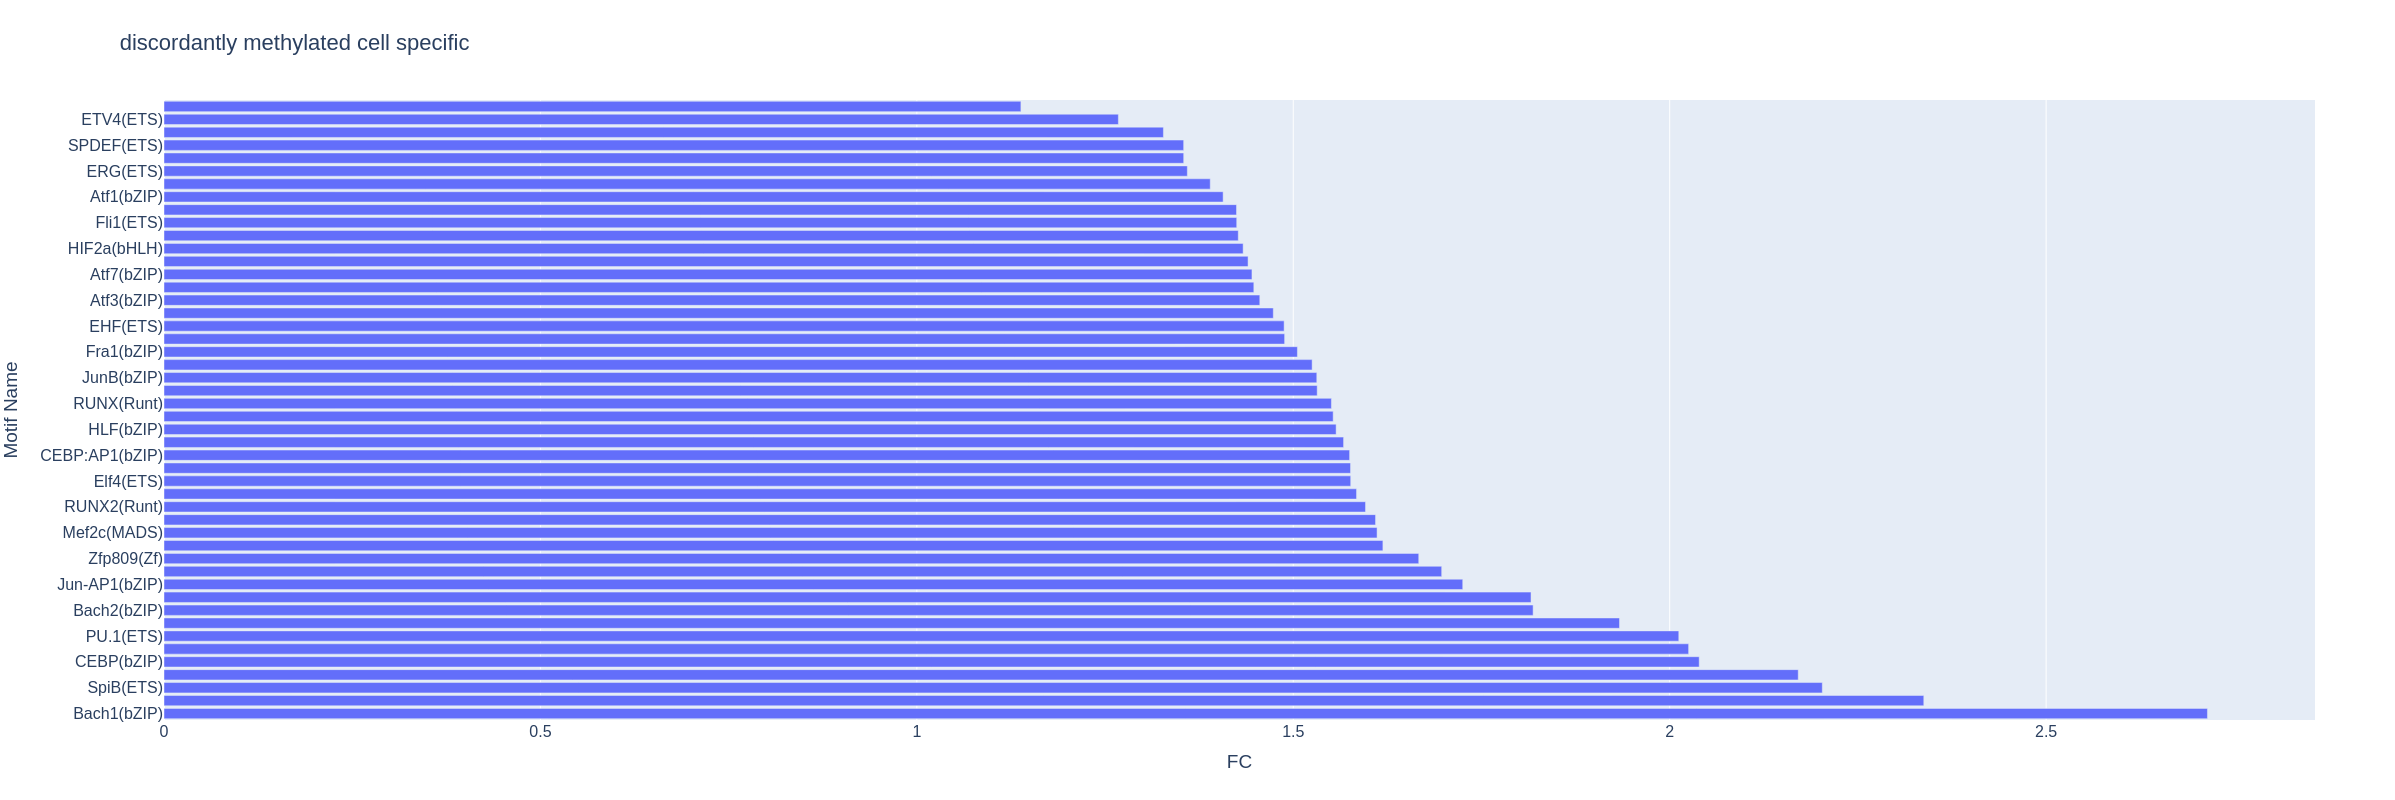

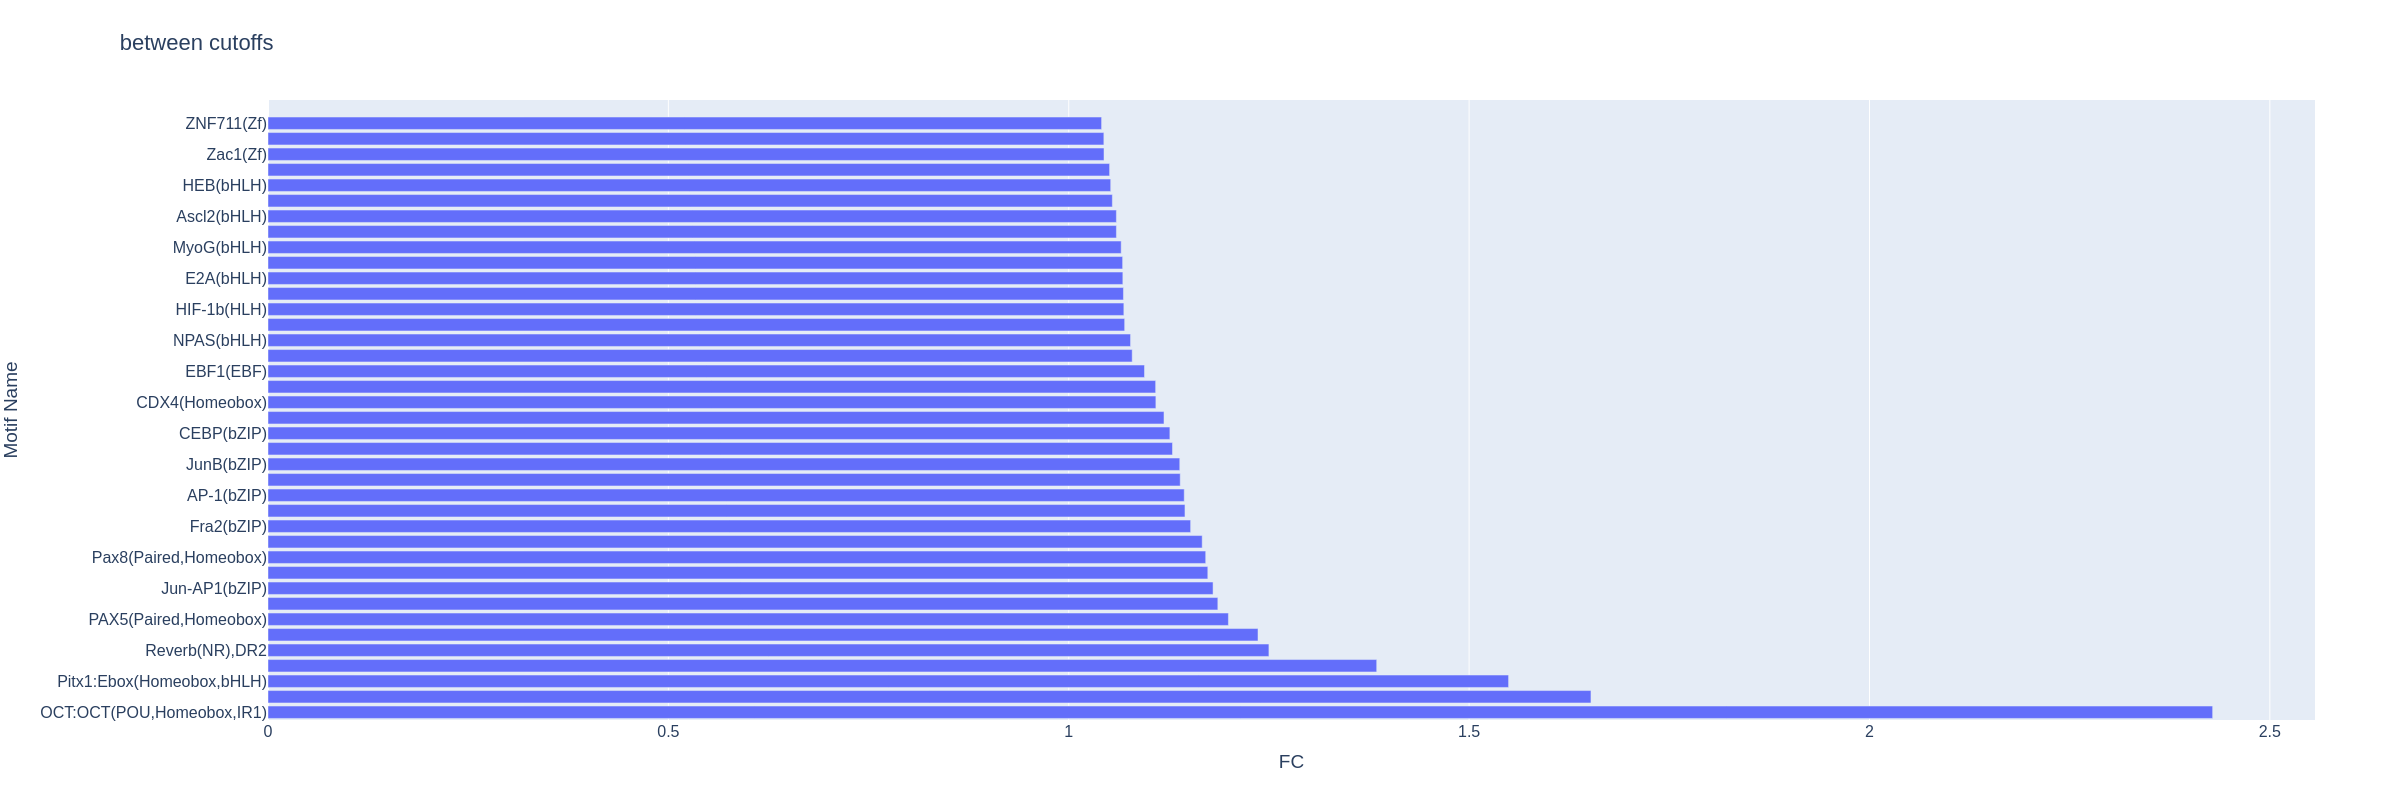

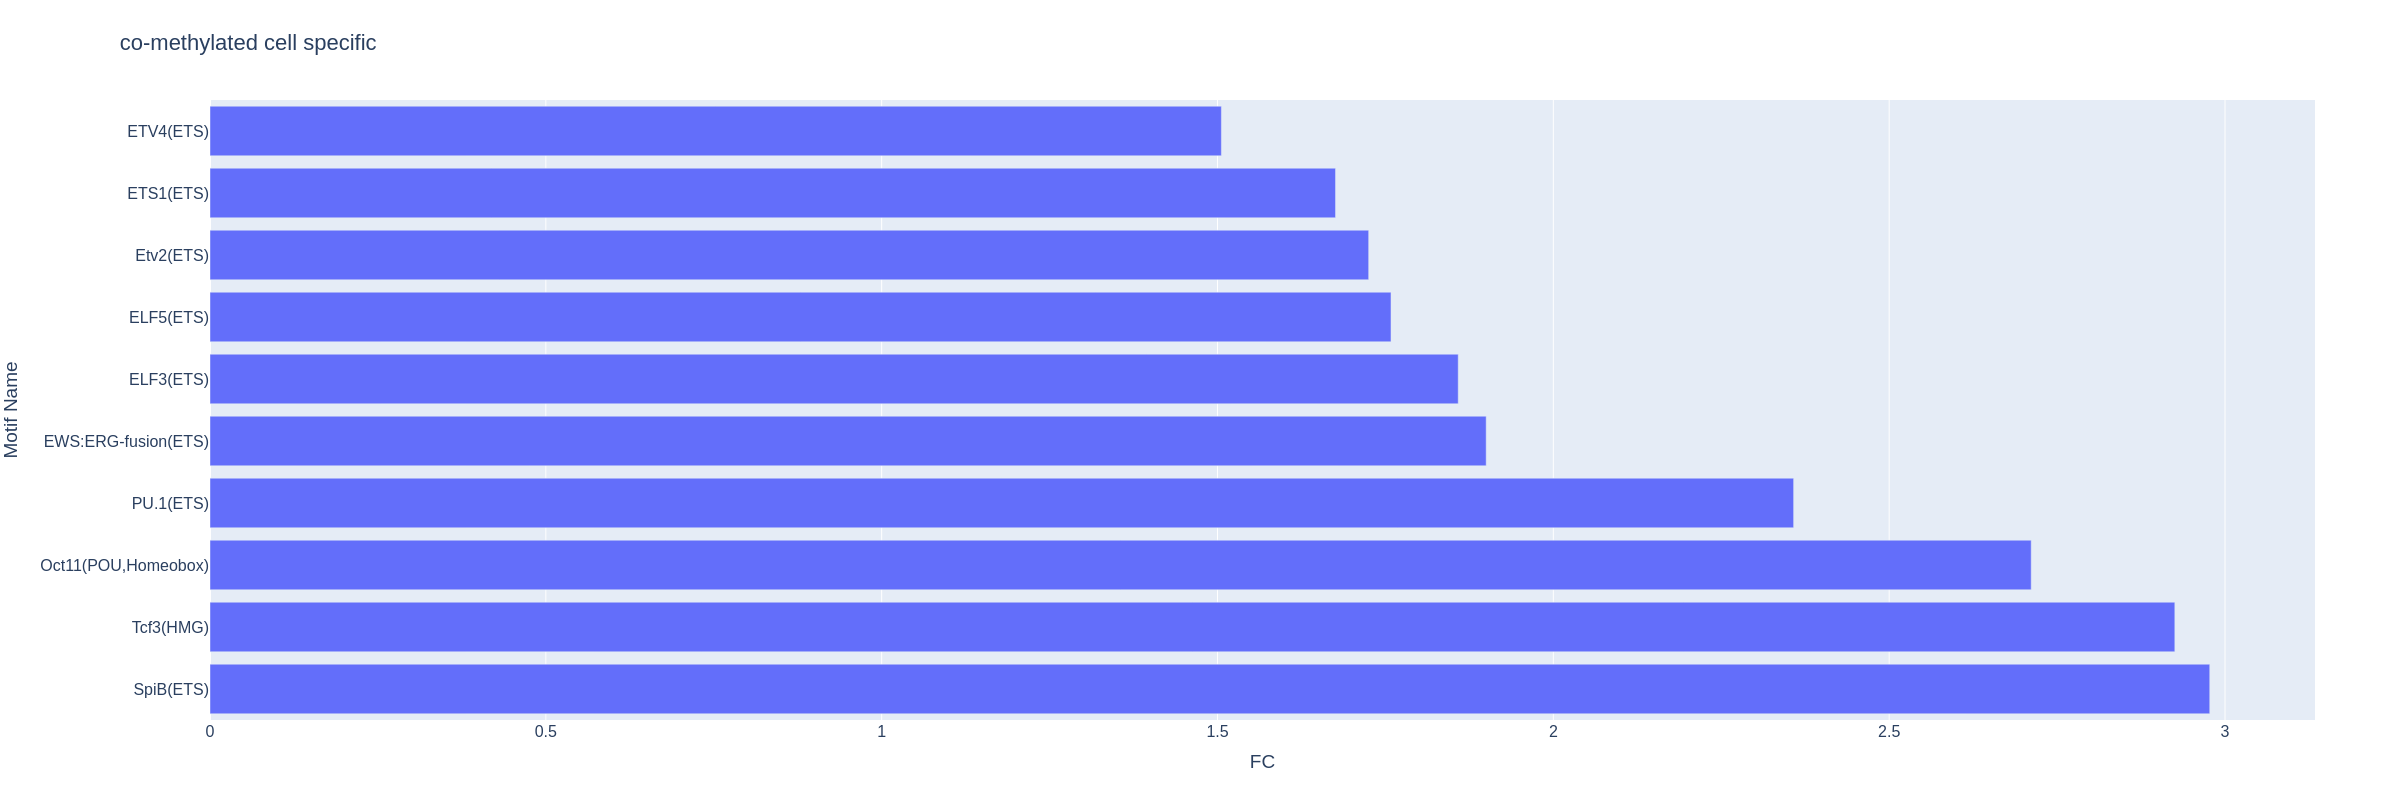

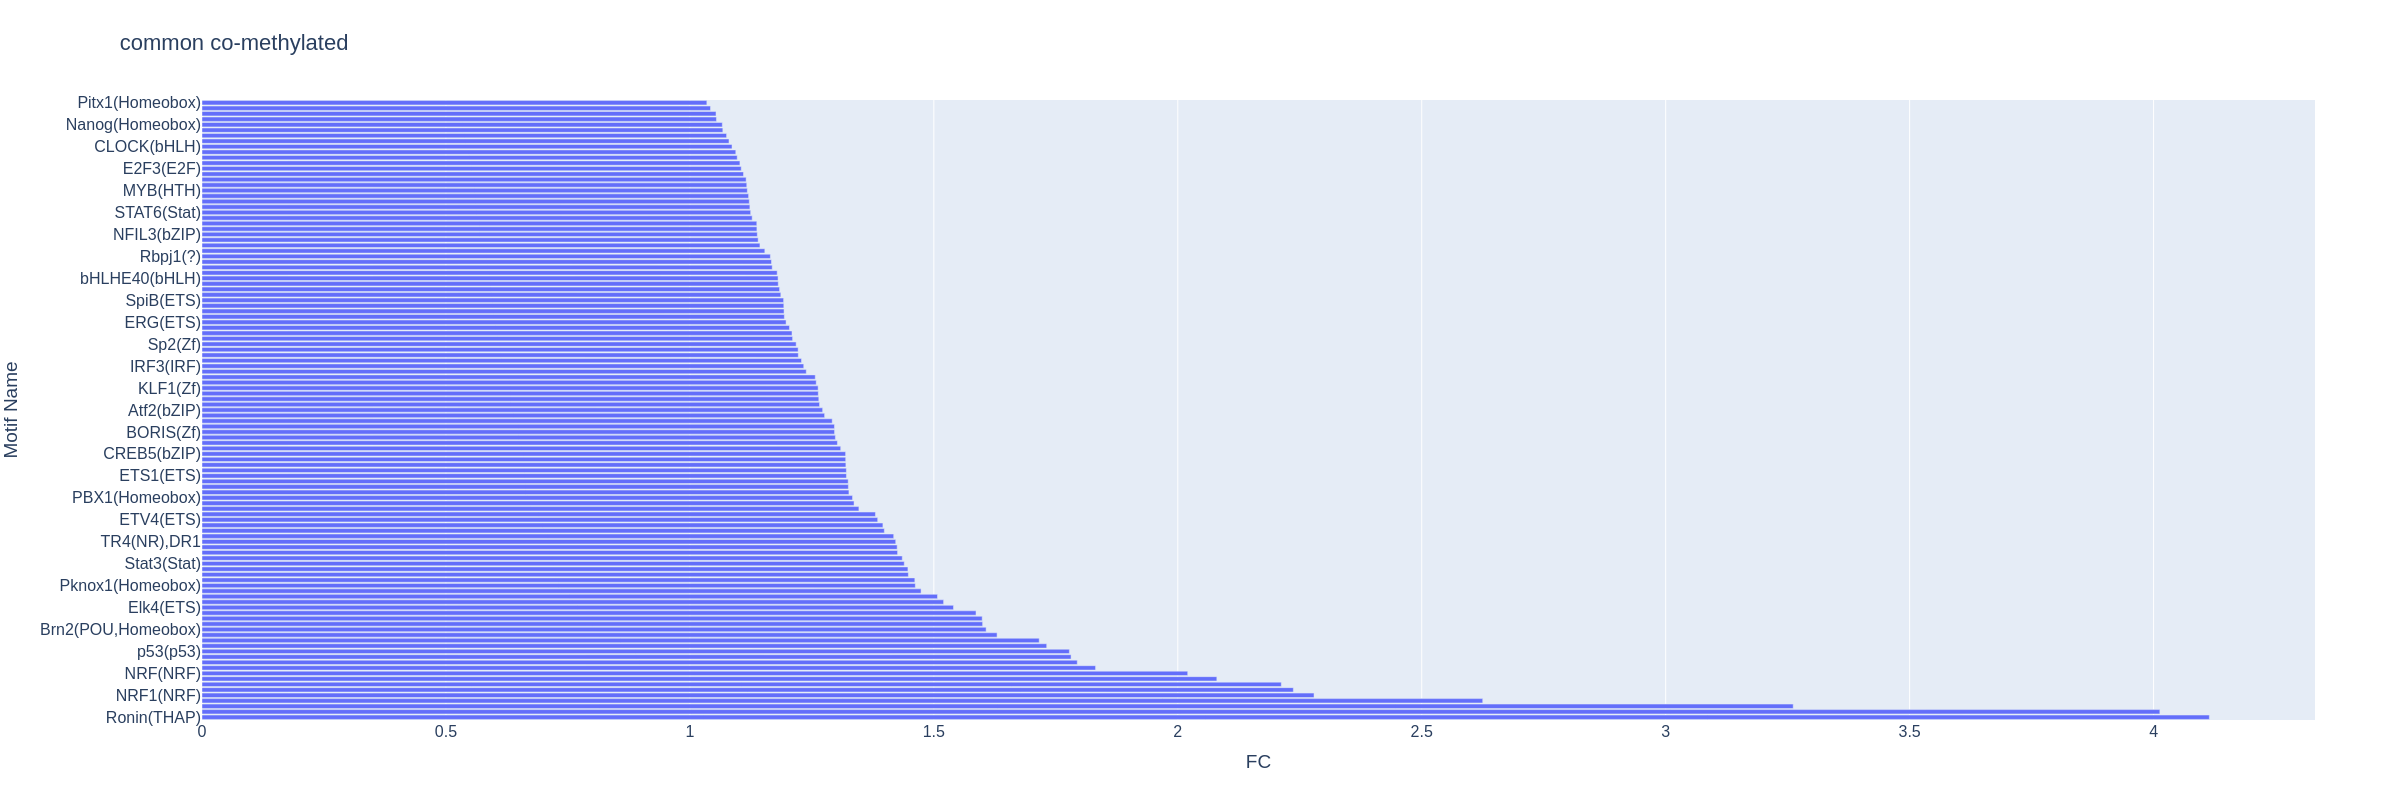

Not applicable if less than 1 significant TF found


In [31]:
analysis.homer() # run HOMER tool, it requires findMotifsGenome.pl script to be available 
analysis.make_homer_plots() # plot results

DB: ../../external/LOLA_DB/ Input: EXAMPLE_PROJECT/files/discordantly methylated cell specific.bed BG: EXAMPLE_PROJECT/files/BG.bed Output: EXAMPLE_PROJECT/files/LOLA_discordantly methylated cell specific.csv
Reading collection annotations: 
	EPIC_Relation_To_Island: found collection annotation:../../external/LOLA_DB/EPIC_Relation_To_Island/collection.txt
	EPIC_UCSC_RefGene_Group: found collection annotation:../../external/LOLA_DB/EPIC_UCSC_RefGene_Group/collection.txt
	WBC_15_state_core_model: found collection annotation:../../external/LOLA_DB/WBC_15_state_core_model/collection.txt
Reading region annotations...
../../external/LOLA_DB//EPIC_Relation_To_Island/regions
	In 'EPIC_Relation_To_Island', found index file:../../external/LOLA_DB/EPIC_Relation_To_Island/index.txt
Collection: EPIC_Relation_To_Island. Creating size file...
../../external/LOLA_DB//EPIC_UCSC_RefGene_Group/regions
	In 'EPIC_UCSC_RefGene_Group', found index file:../../external/LOLA_DB/EPIC_UCSC_RefGene_Group/index.txt

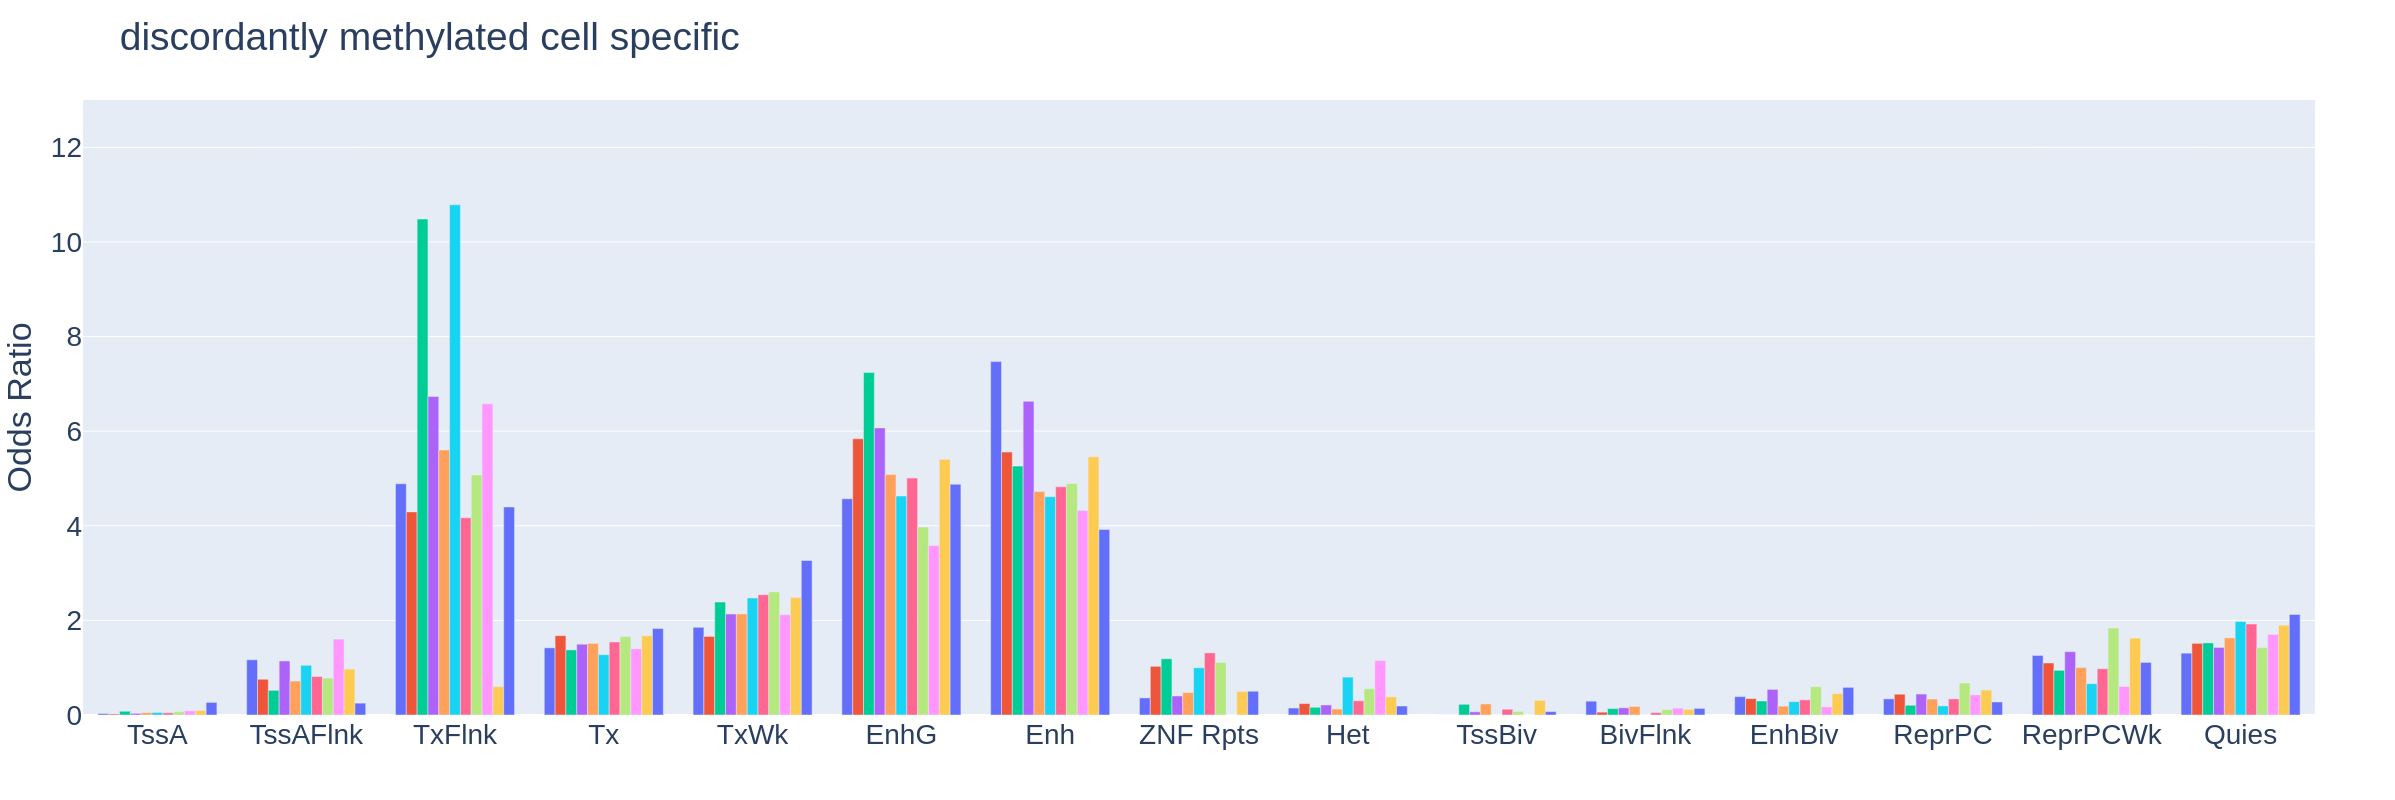

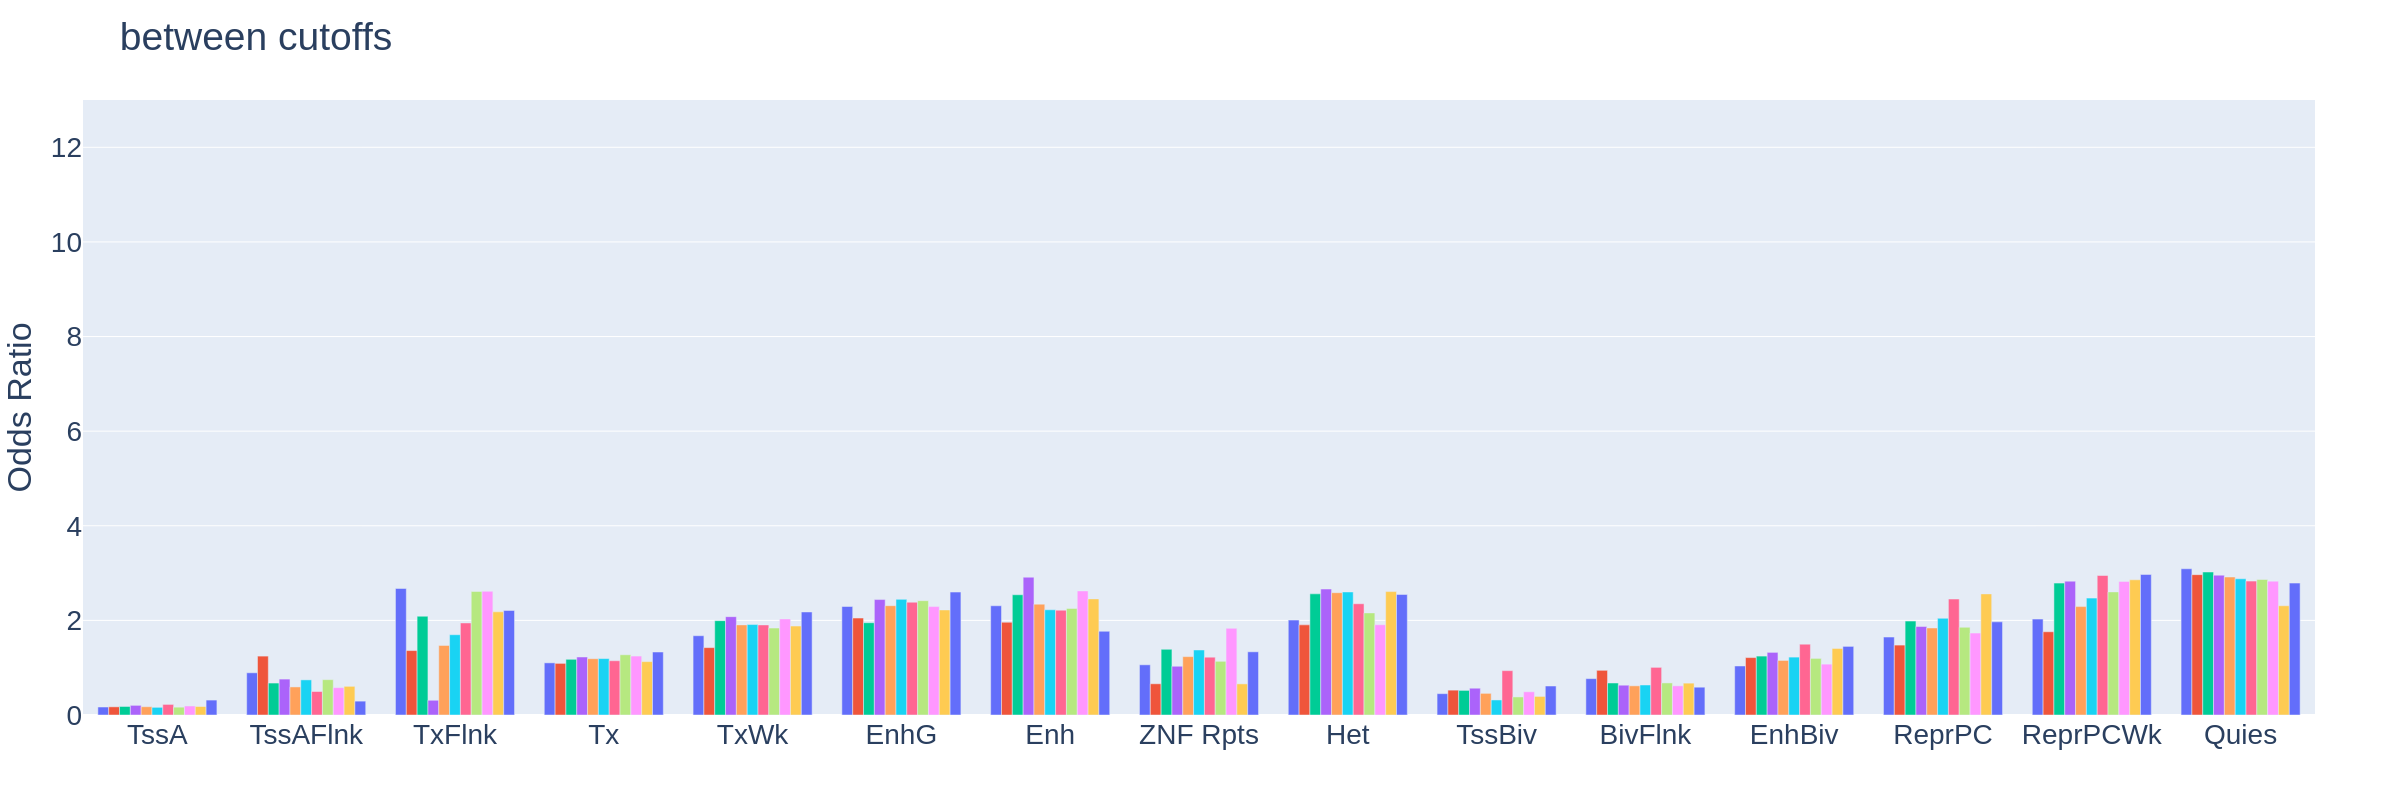

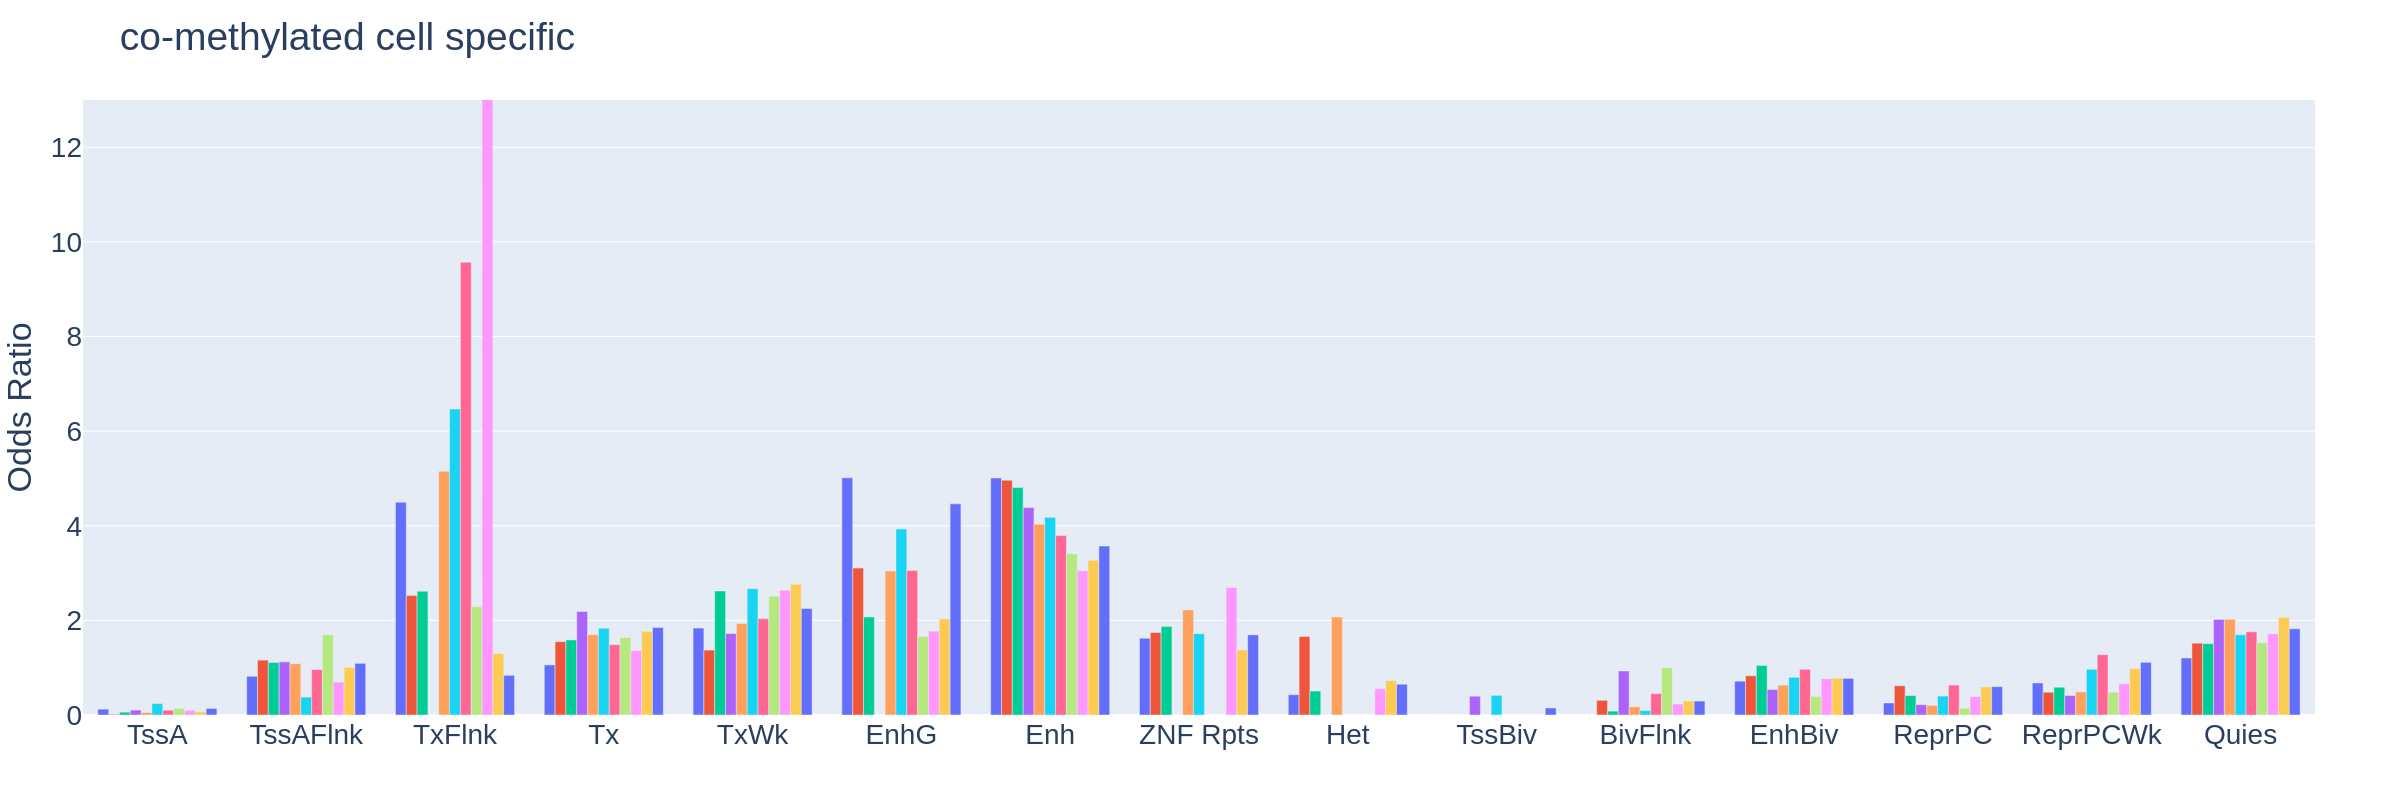

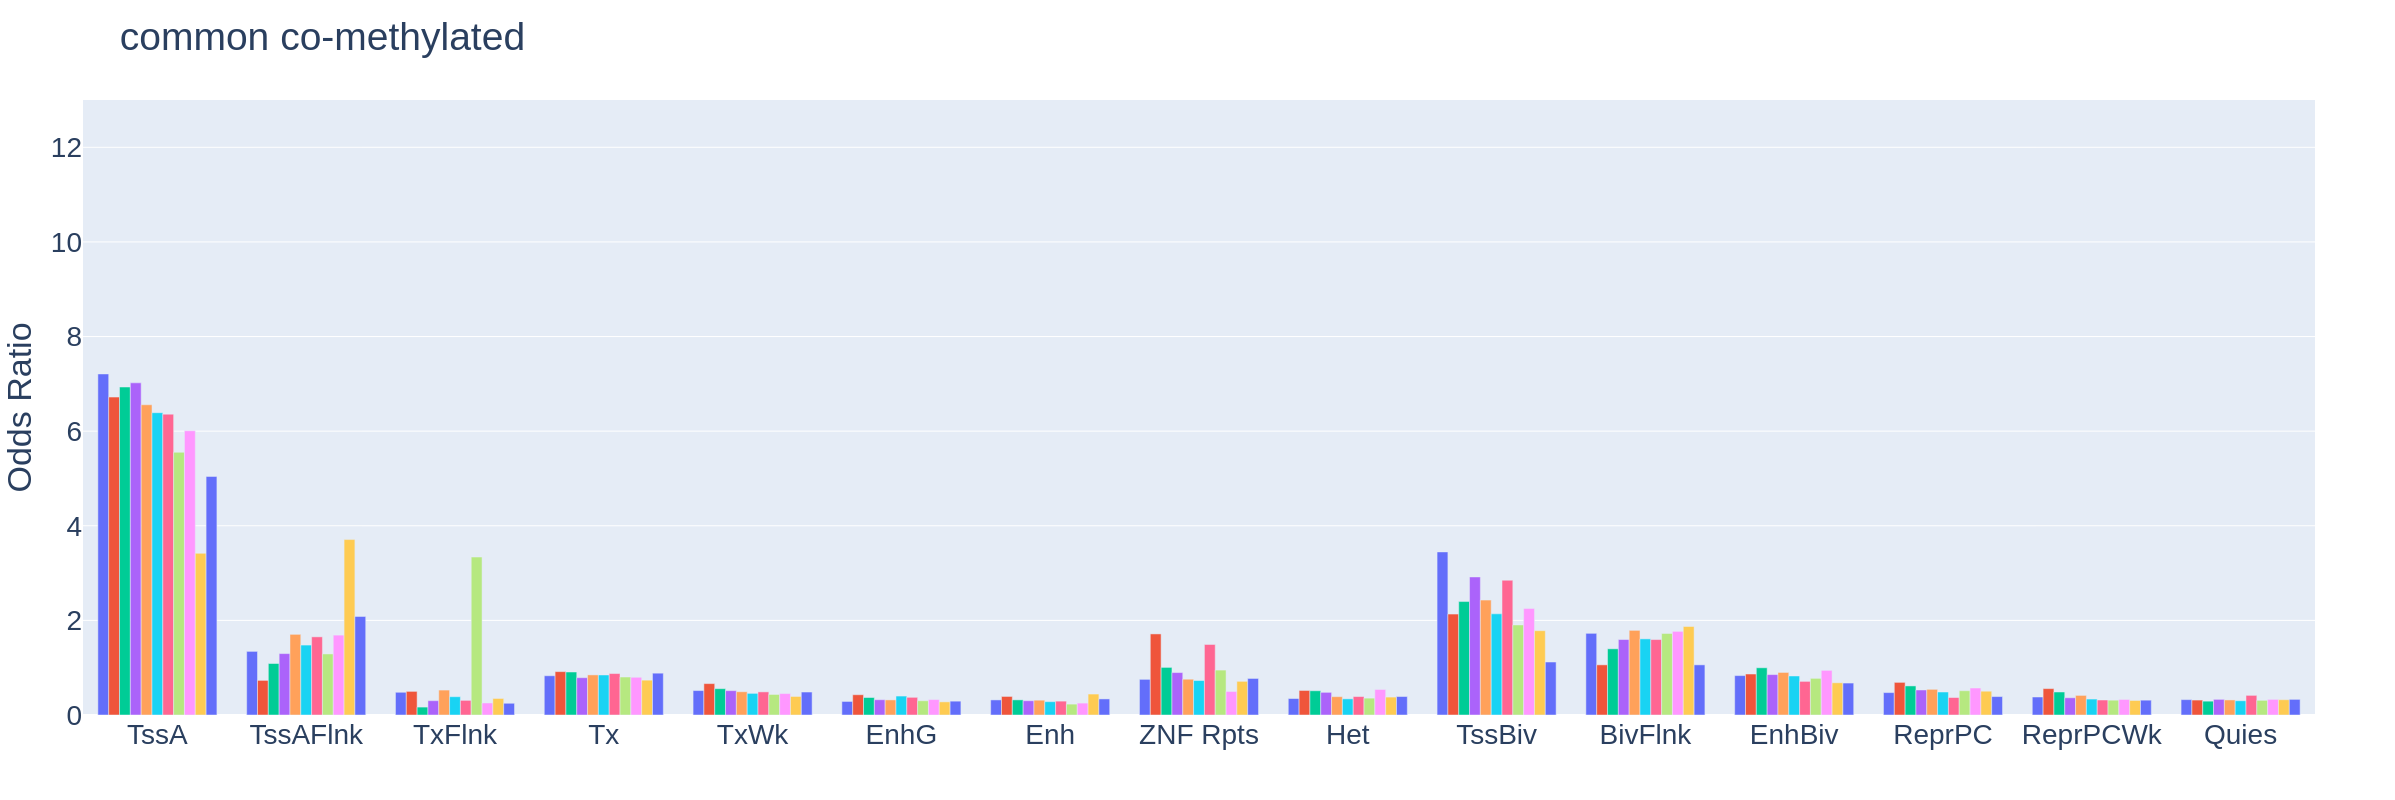

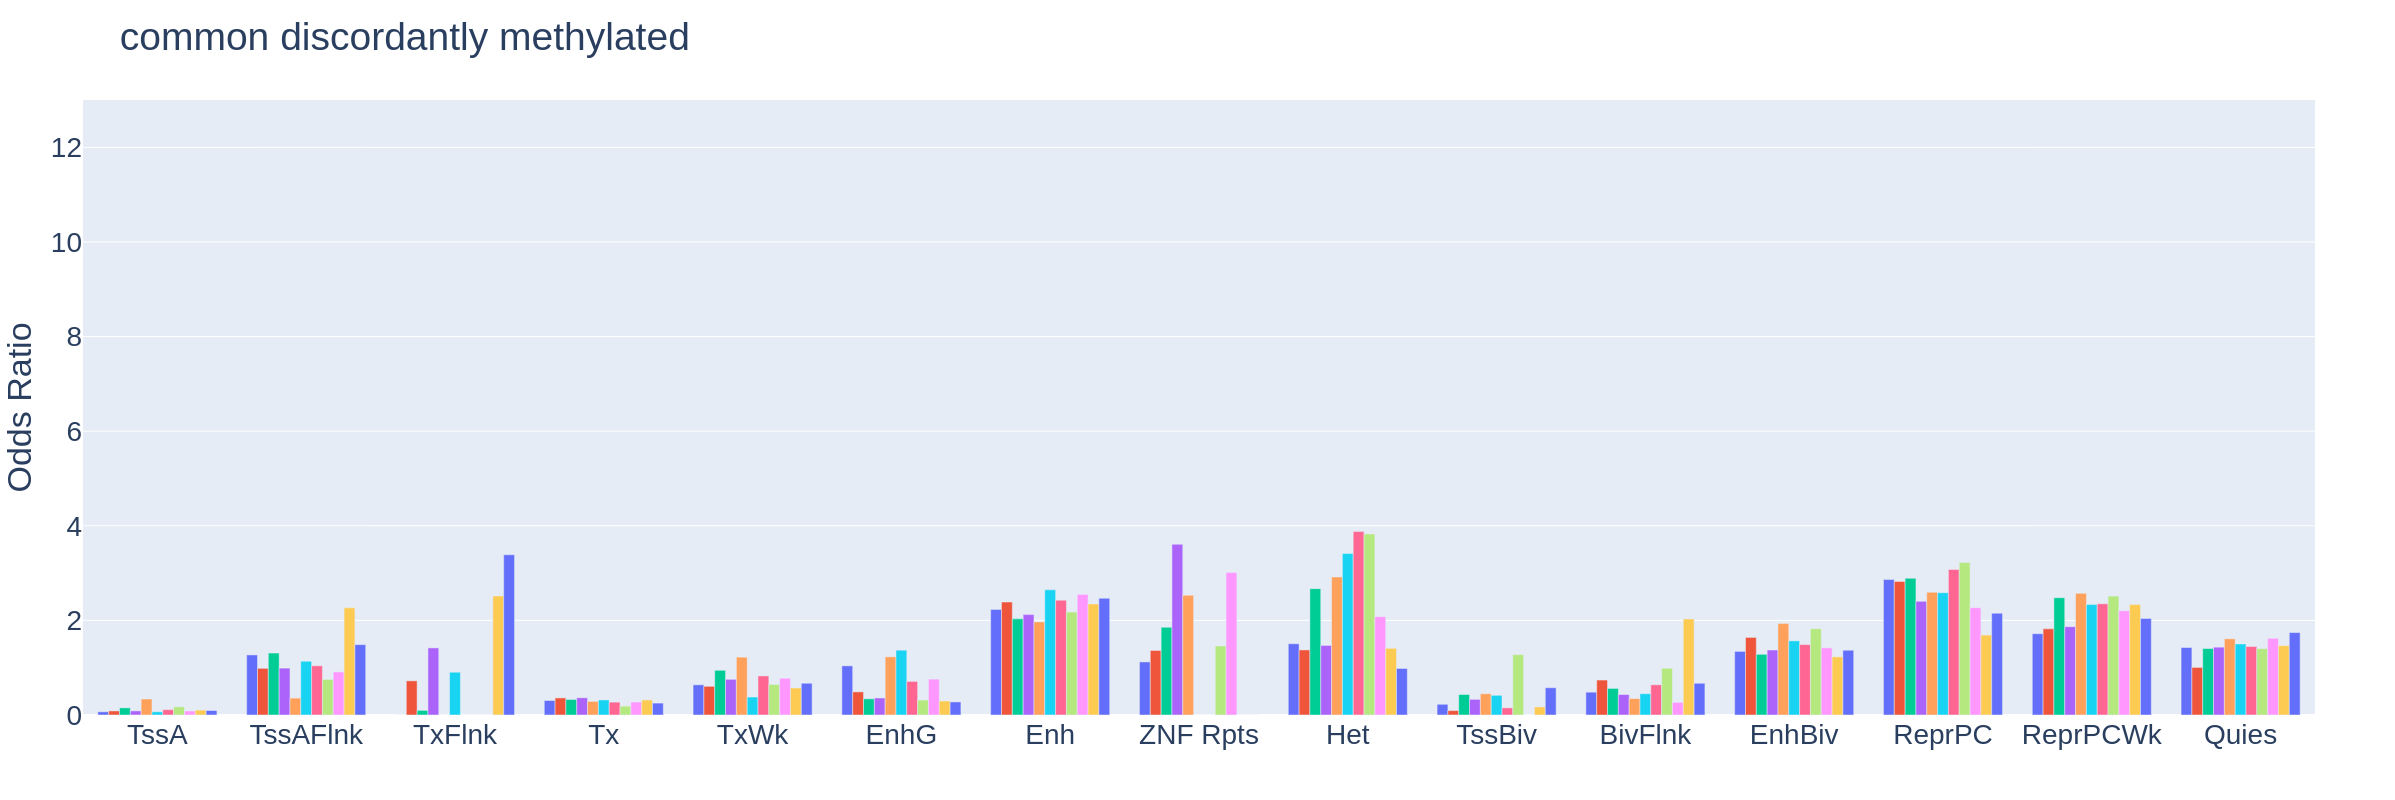

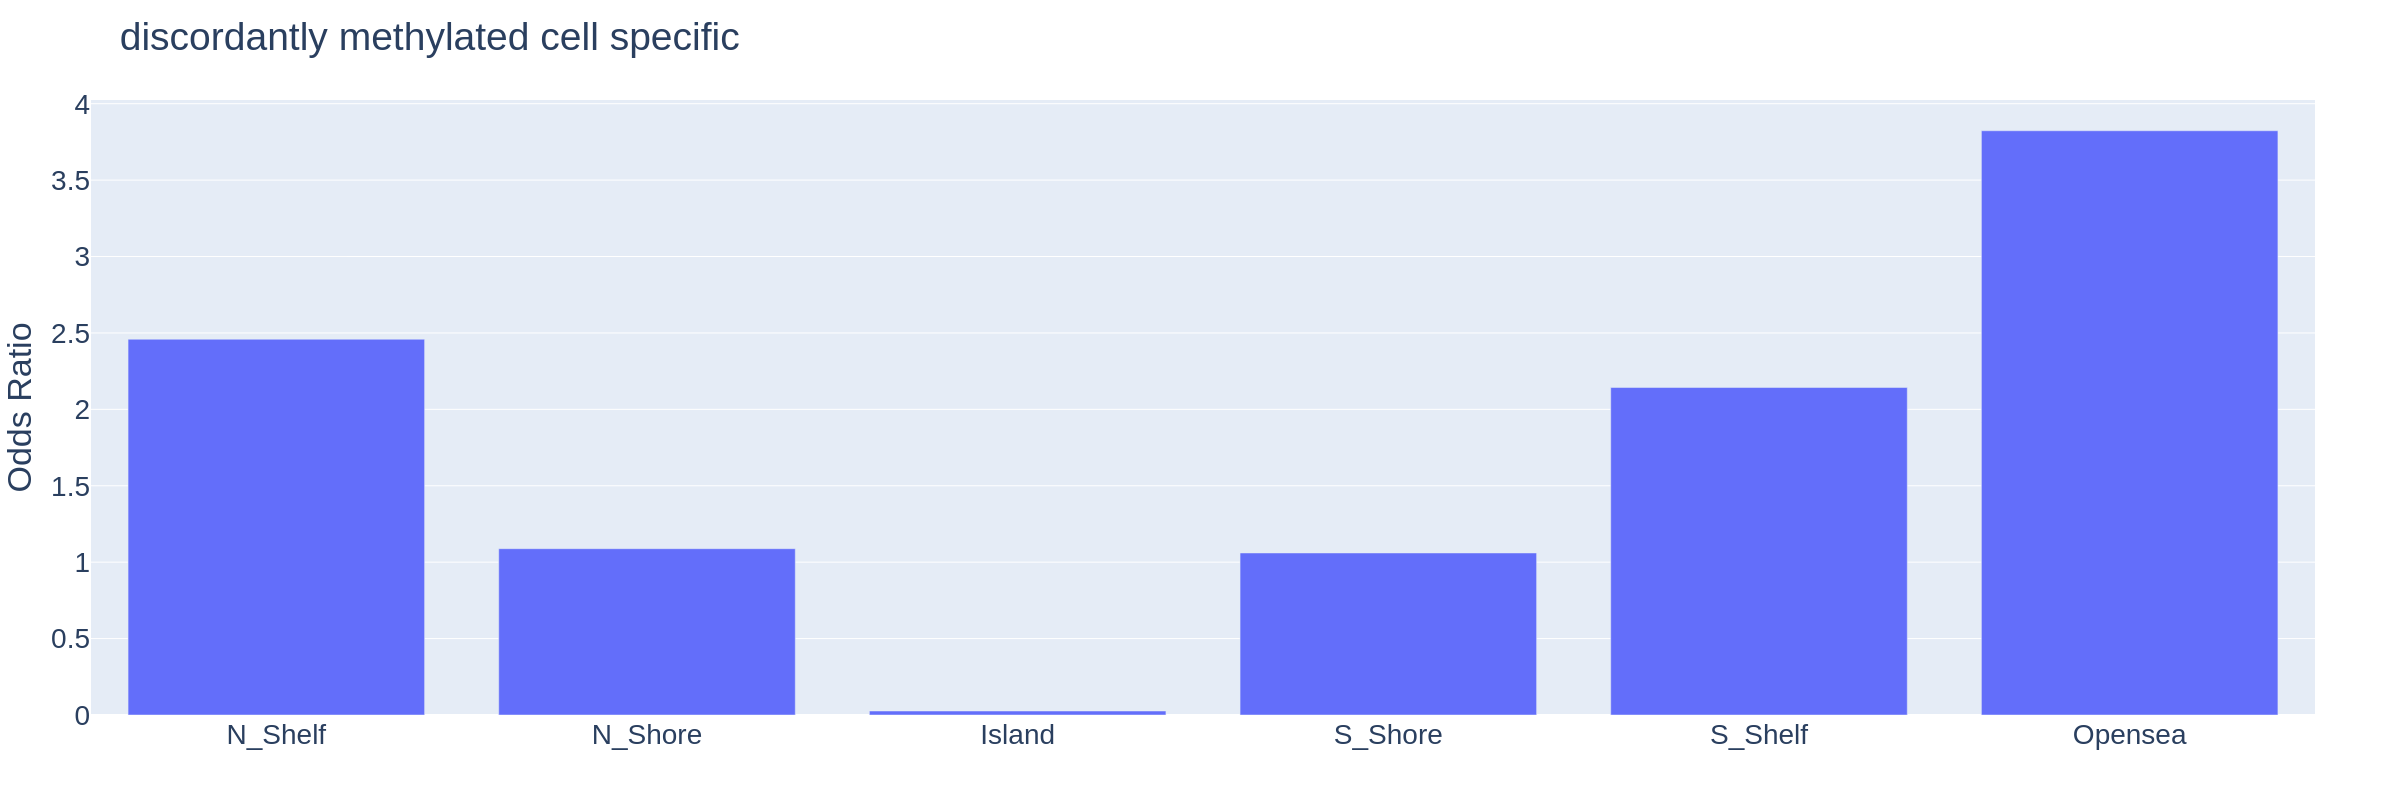

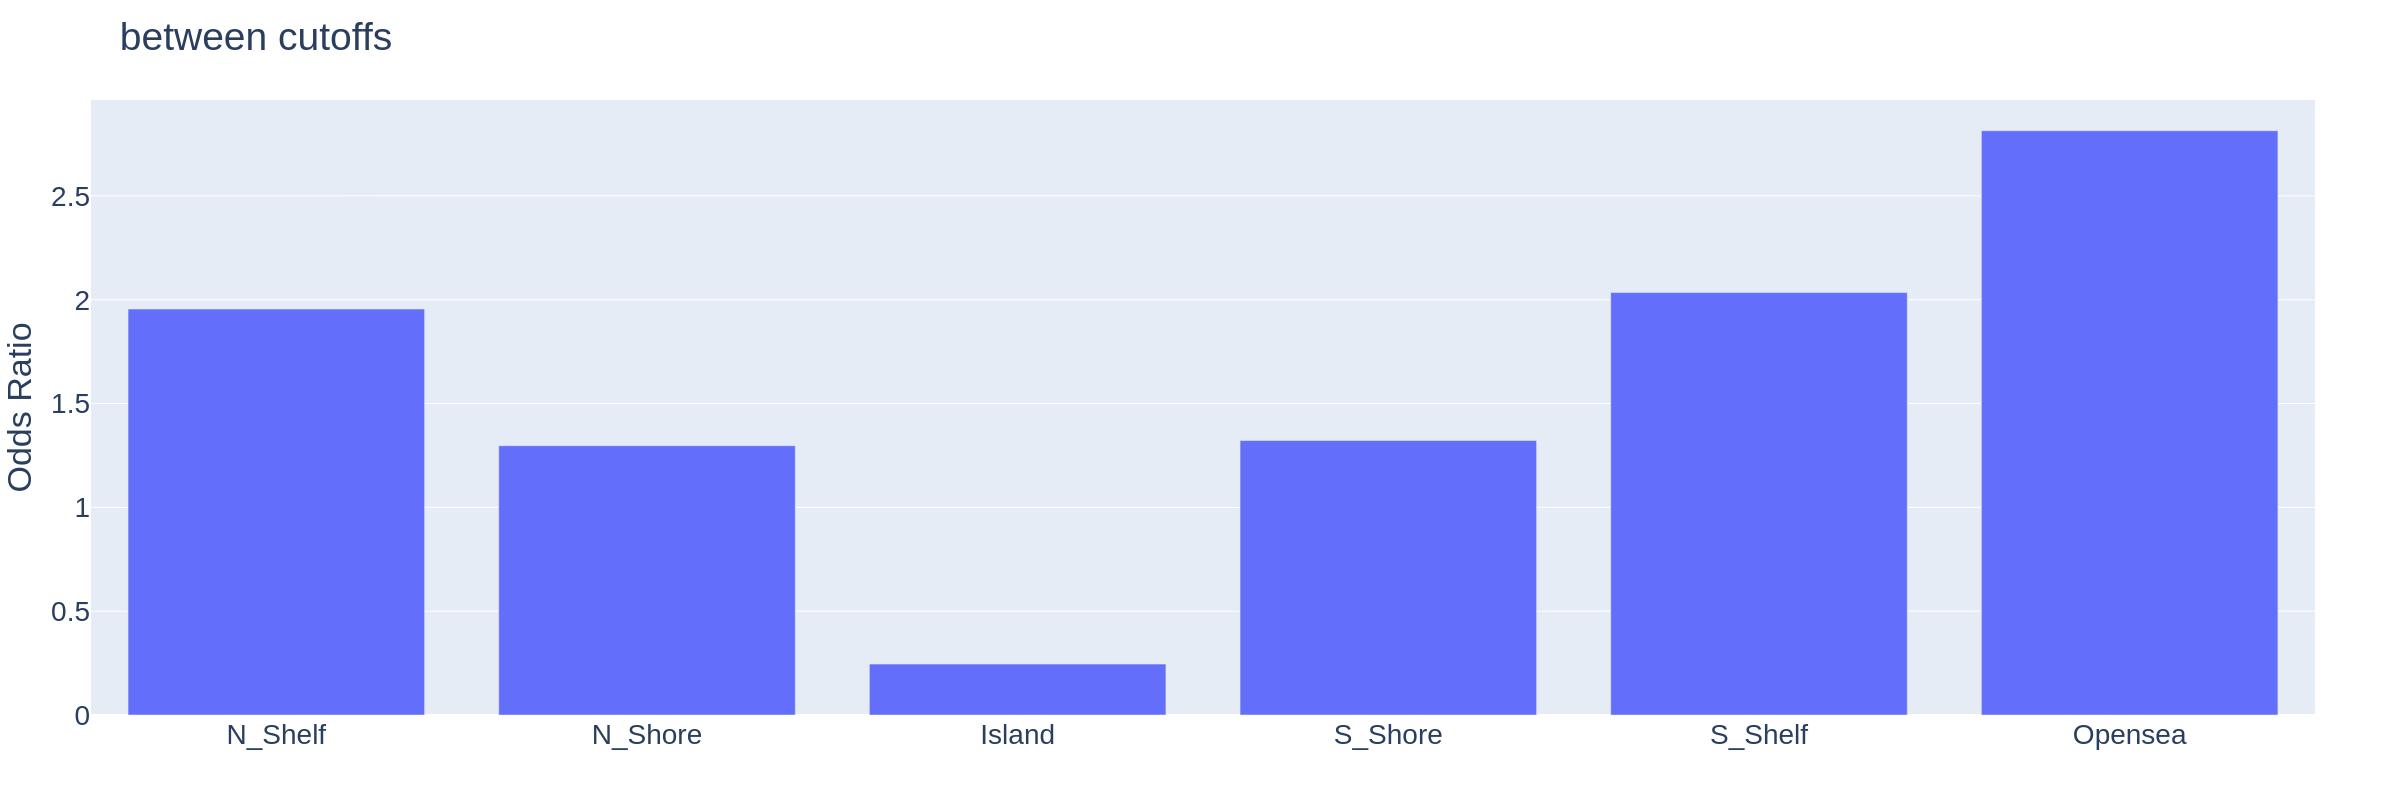

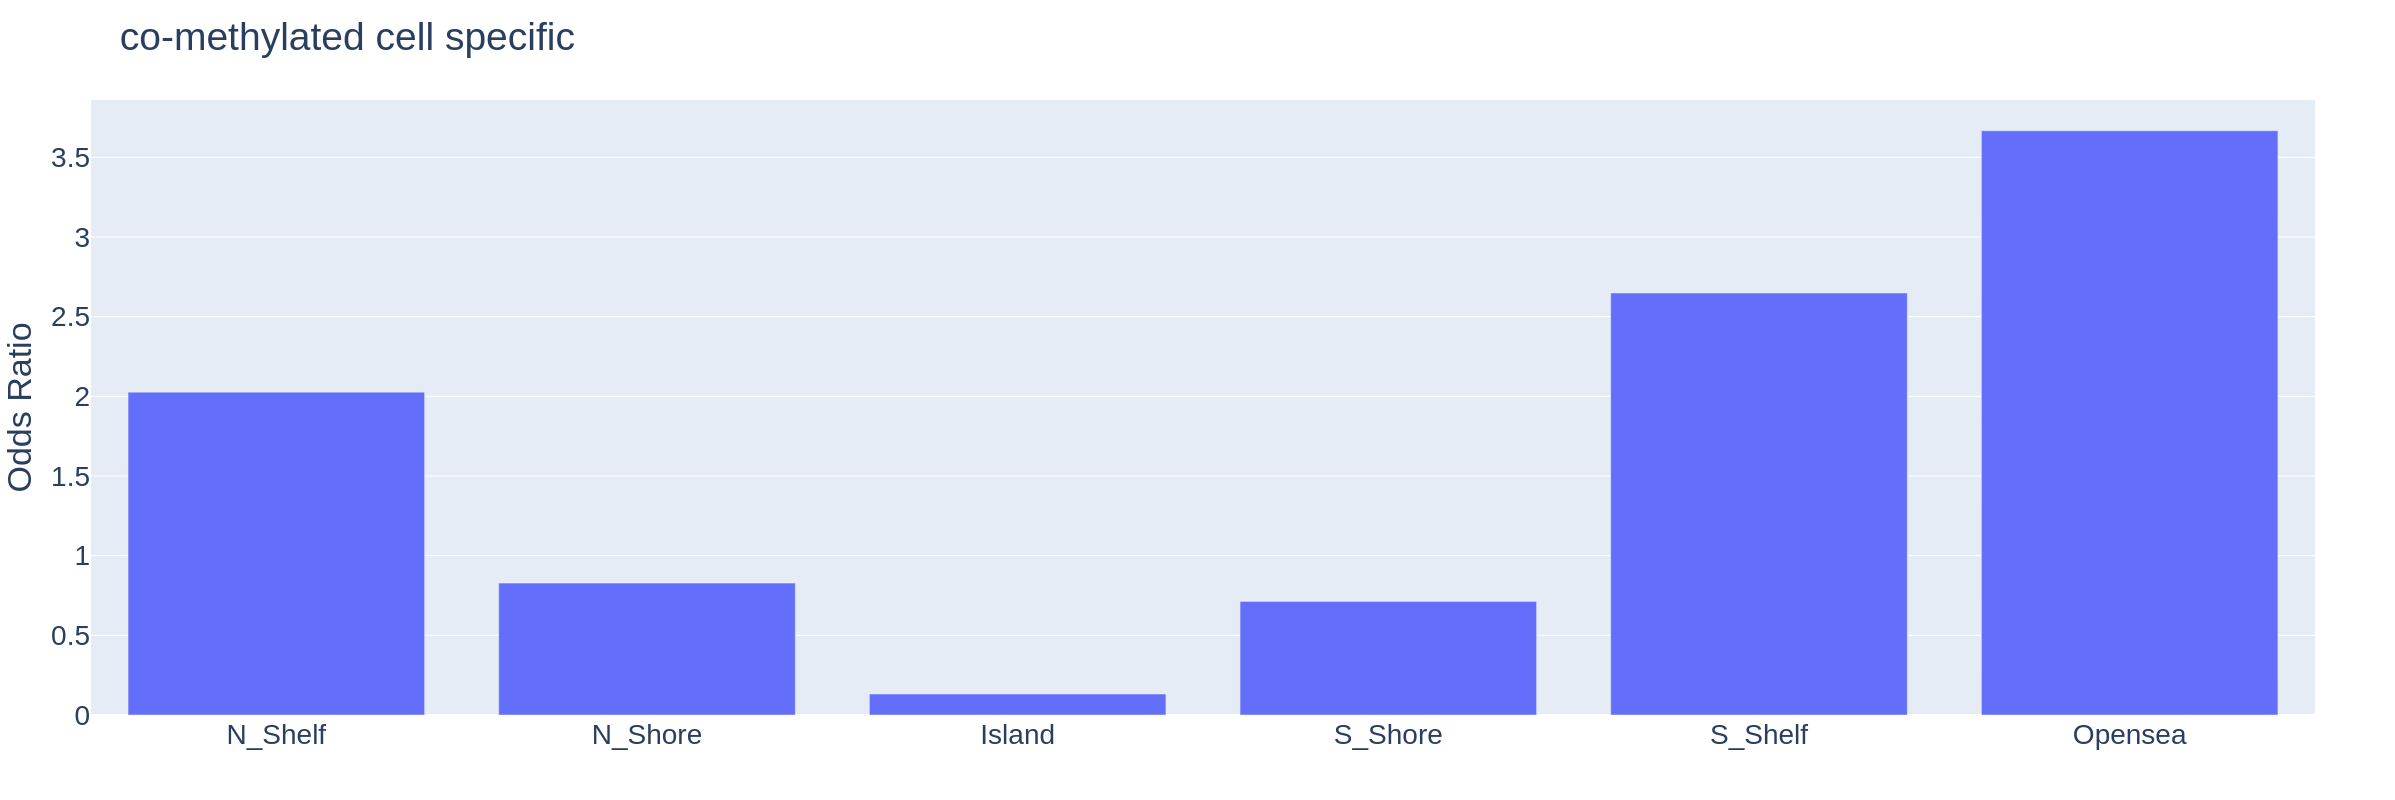

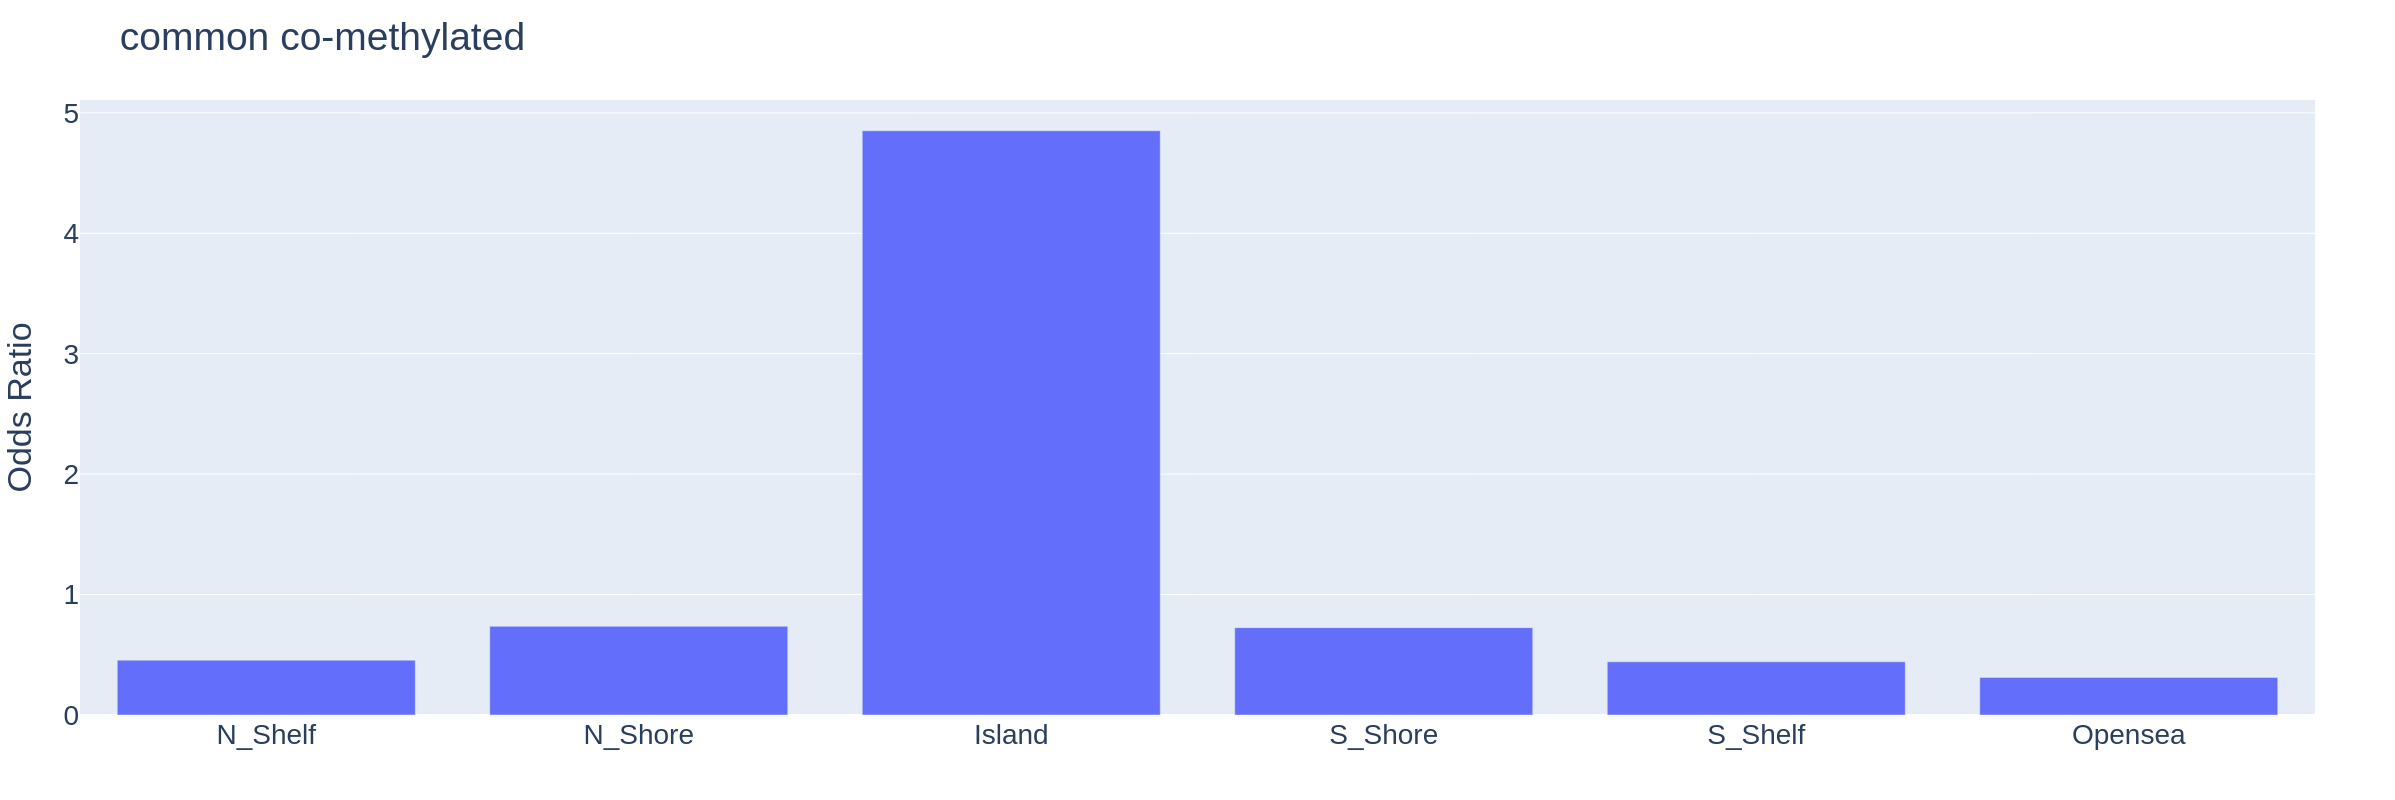

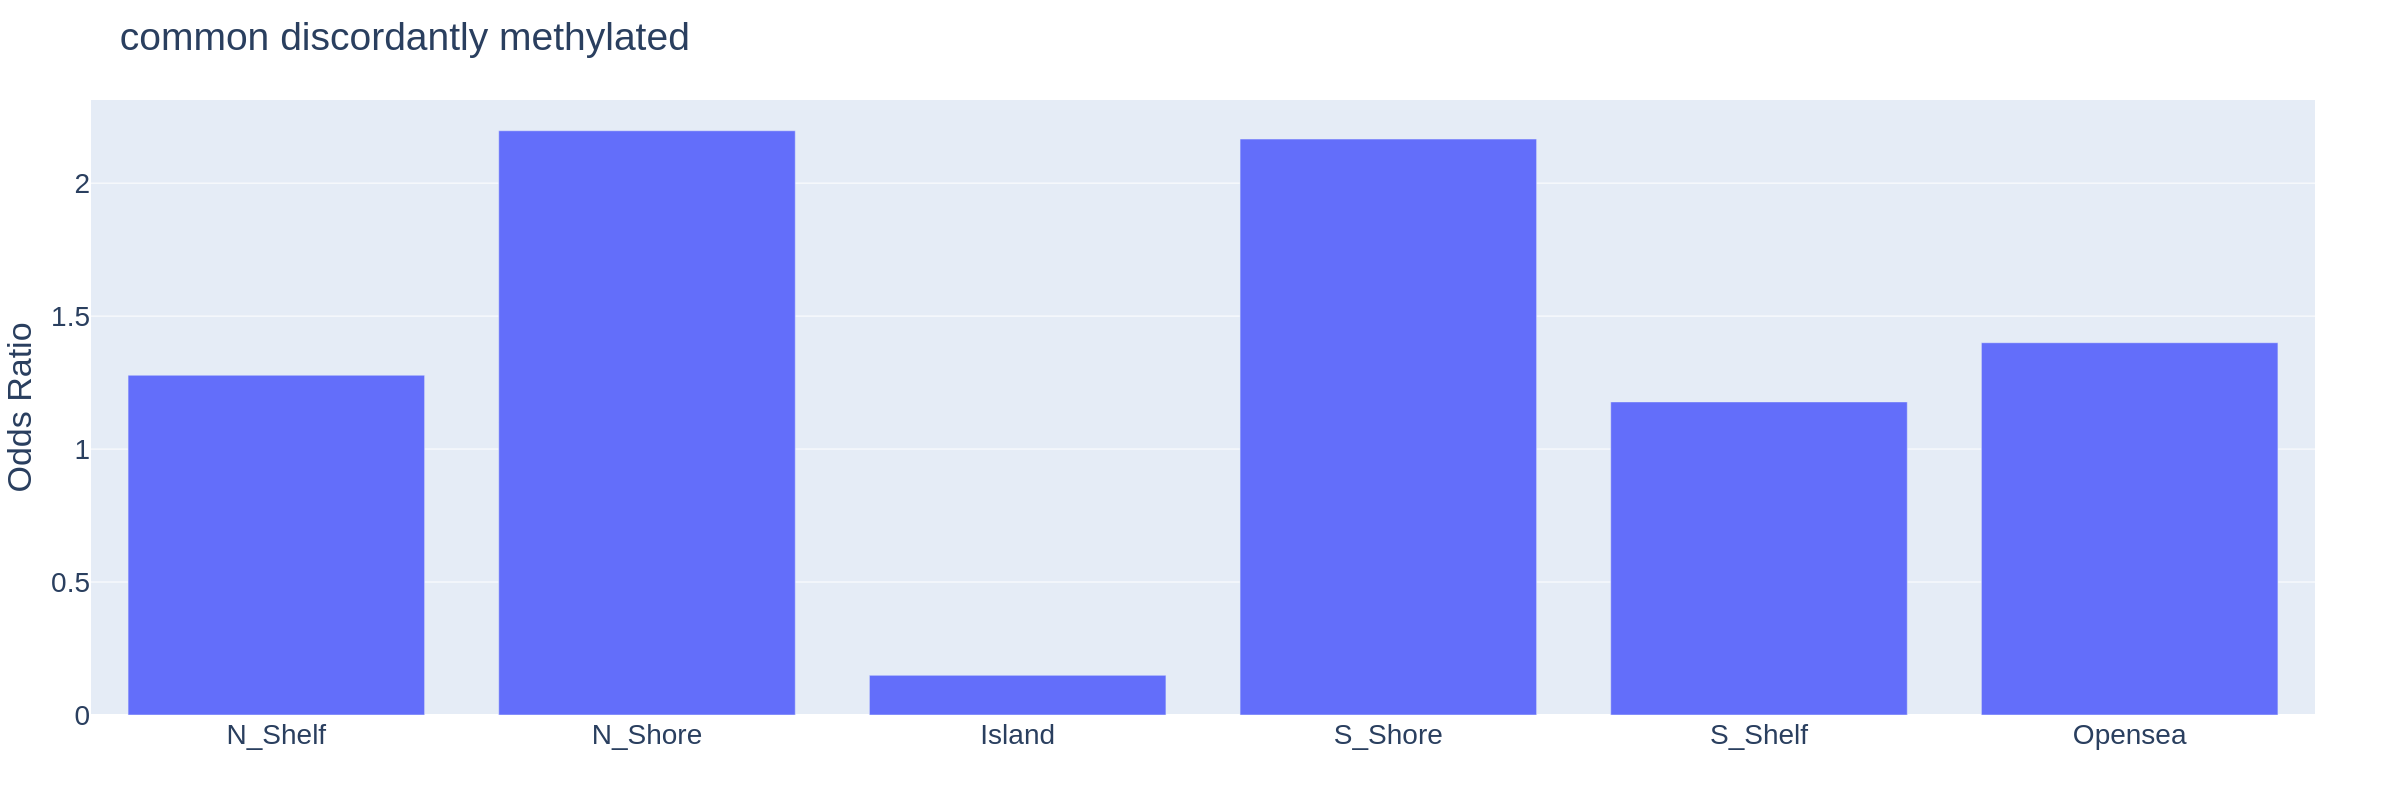

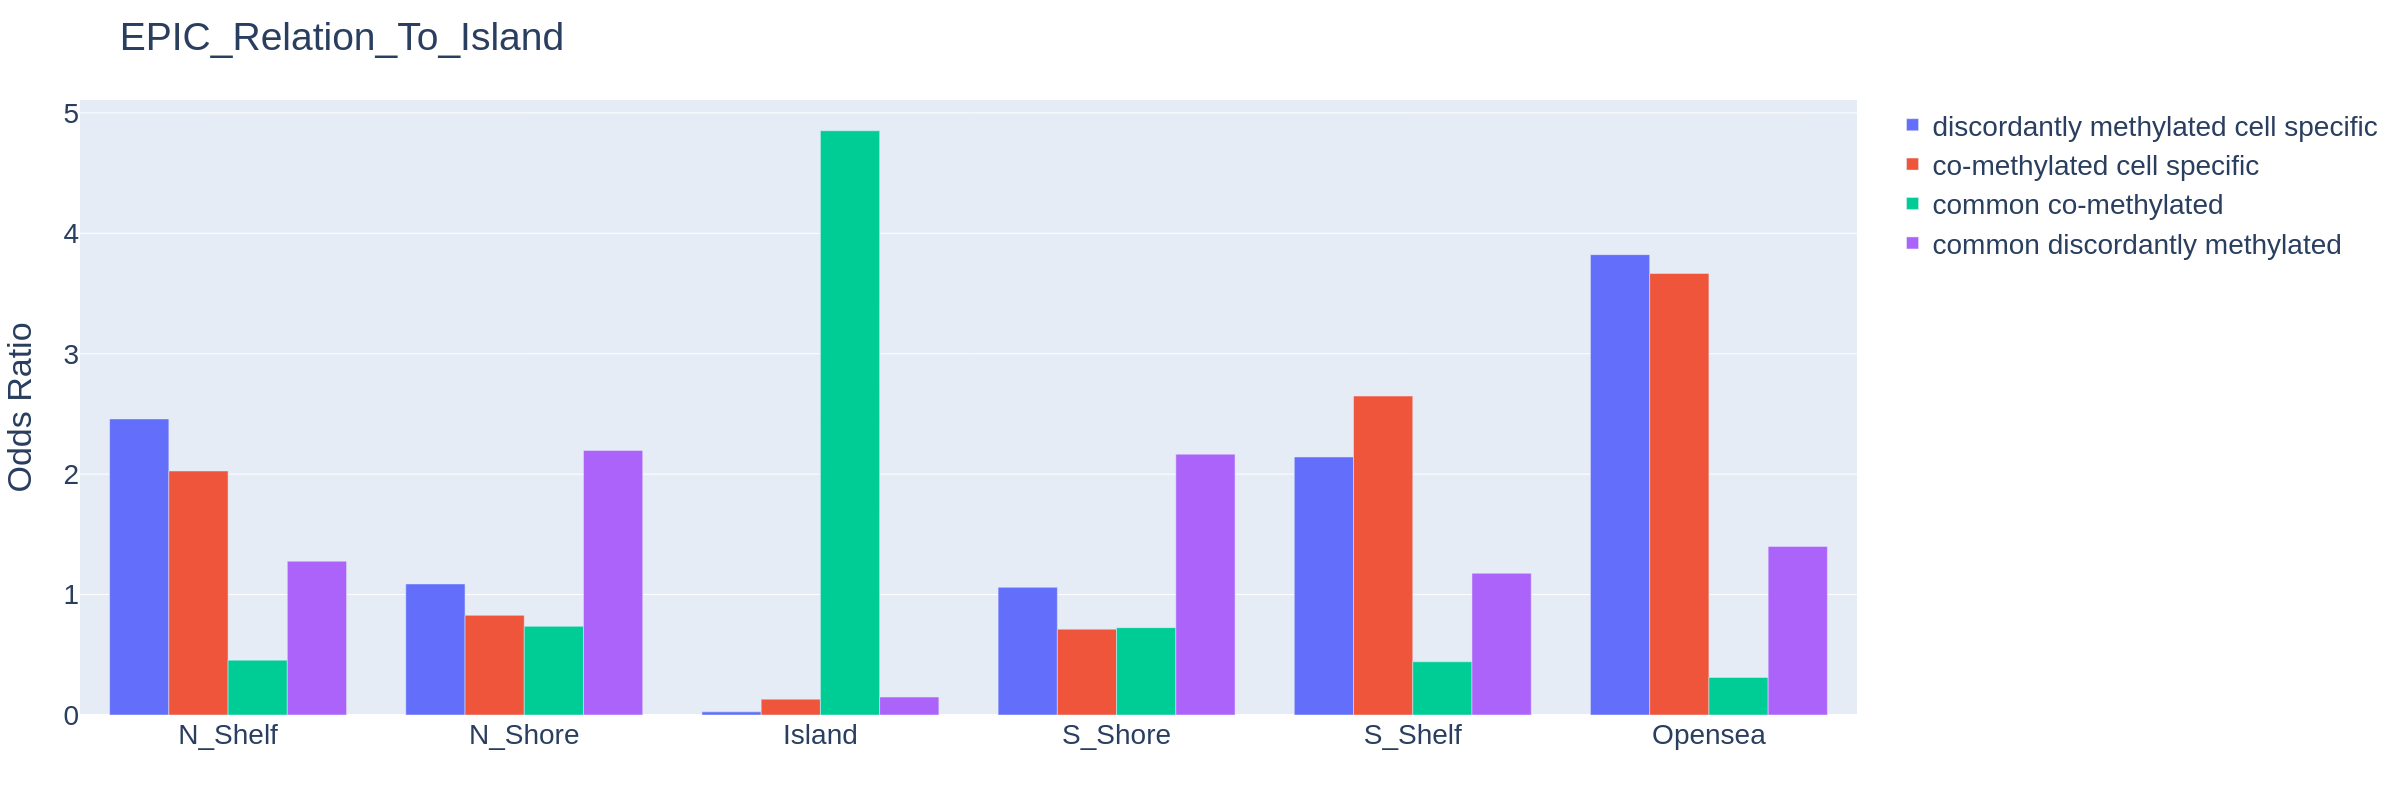

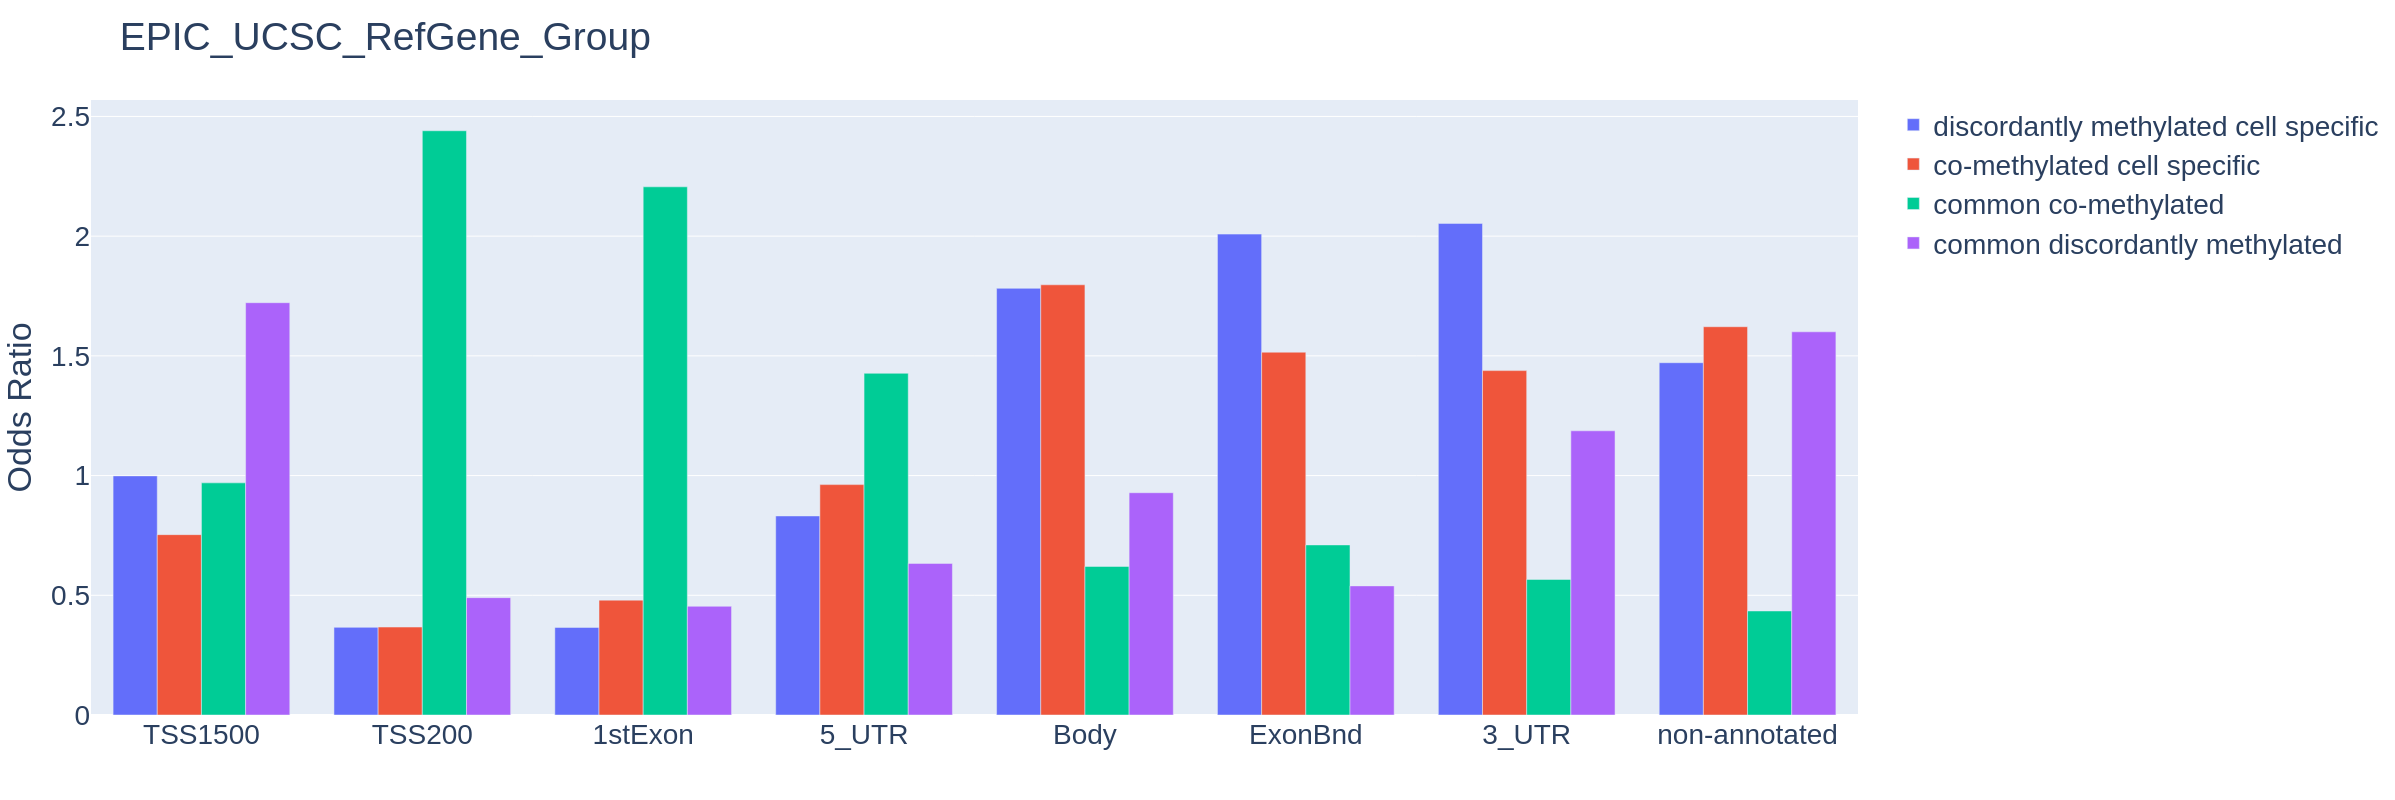

In [32]:
analysis.lola("Rscripts/LOLA.R", "../../external/LOLA_DB/") # run LOLA tool, it requires LOLA DATABASE not provided in this repository.

analysis.update_lola_output()
analysis.lola_plot(collection="WBC_15_state_core_model")
analysis.lola_plot(collection="EPIC_Relation_To_Island")
analysis.lola_grouped_plot()